In [347]:
#install.packages("sjmisc")
#install.packages("fdth", quiet=TRUE)

library(readxl)
library(sjmisc)
library(fdth)
library(dplyr)

In [348]:
options(warn=-1)

In [349]:
dataset <- read_excel("./lapaz_troncales_limpio.xlsx")
dim(dataset)

[1] 70641    17

In [350]:
str(dataset)

Classes 'tbl_df', 'tbl' and 'data.frame':	70641 obs. of  17 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : chr  "MAÑANA" "MAÑANA" "MAÑANA" "MAÑANA" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" ...
 $ Documento         : num  1.14e+08 1.14e+08 1.14e+08 1.14e+08 1.14e+08 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "CIENCIAS NATURALES" "CIENCIAS SOCIALES" "EDUCACIÓN FÍSICA" "LENGUA" ...
 $ NivelEnseñanza    : chr  "PRIMARIO" "PRIMARIO" "PRIMARIO" "PRIMARIO" ...
 $ Nivel             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Modalidad         : chr  "Primaria" "Primaria" "Primaria" "Primaria" ...
 $ ModEnseñanza      : chr  "Comun" "Comun" "Comun" "Comun" ...
 $ AñoCursado        : num  3 3 3 3 3 5 5 5 5 5 ...
 $ NotasPrimerT      : num  8 8 9 9 10 8 8 7 8 8 ...
 $ NotasSegund

In [351]:
ftable(dataset$turno )

 COMPLETO DIURNO INTERMEDIO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                                                  
      631    649         10  44017   198      863 24189         84

In [352]:
ftable(dataset$AñoCursado)

     1     2     3     4     5     6     7
                                          
 11254 10189 10940 14132 12882 11035   131

In [353]:
ftable(dataset$NivelEnseñanza)

 EGB 3 PRIMARIO SECUNDARIO
                          
  2653    26792      41196

## Eliminamos la columna de Nivel, ya que NivelEnseñanza nos brinda más información que la anterior y están relacionadas.
## También eliminamos la columna de año ya que todos nuestros datos son del 2022, sería redundante dejarla.

In [354]:
dataset_mas_limpio <- dplyr::select(dataset, -c(año, Nivel))

In [355]:
head(dataset_mas_limpio)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,asignatura,NivelEnseñanza,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS SOCIALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,EDUCACIÓN FÍSICA,PRIMARIO,Primaria,Comun,3,9,9,9,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,LENGUA,PRIMARIO,Primaria,Comun,3,9,8,10,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,MATEMÁTICA,PRIMARIO,Primaria,Comun,3,10,9,9,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,14082908,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,5,8,8,8,8.000000,APROBADO


In [356]:
names(dataset_mas_limpio)

[1] "CUE"                "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "NivelEnseñanza"     "Modalidad"          "ModEnseñanza"      
[10] "AñoCursado"         "NotasPrimerT"       "NotasSegundoT"     
[13] "NotasTercerT"       "Promedio"           "CondicionFinal"

In [357]:
dim(dataset_mas_limpio)

[1] 70641    15

# Gráficos

In [358]:
ftable(dataset_mas_limpio$Modalidad)

 Primaria Secundaria
                    
    26704      43937

### Graficos de sectores, primaria y secundaria, para analizar la distribución de estudiantes

### Primaria

In [359]:
dataset_mas_limpio_matricula <- dataset_mas_limpio %>% dplyr::distinct(Documento, .keep_all = TRUE)
sectores<-filter(dataset_mas_limpio_matricula, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Primaria")

In [360]:
library(ggplot2)
pie_commute <- round(100 * table(sectores$AñoCursado) / length(sectores$AñoCursado))
pie_commute
porc <- c(pie_commute)
frec<- c(table(sectores$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)


 1  2  3  4  5  6 
19 16 17 16 15 16 

frec,porc
982,19
836,16
863,17
840,16
789,15
841,16


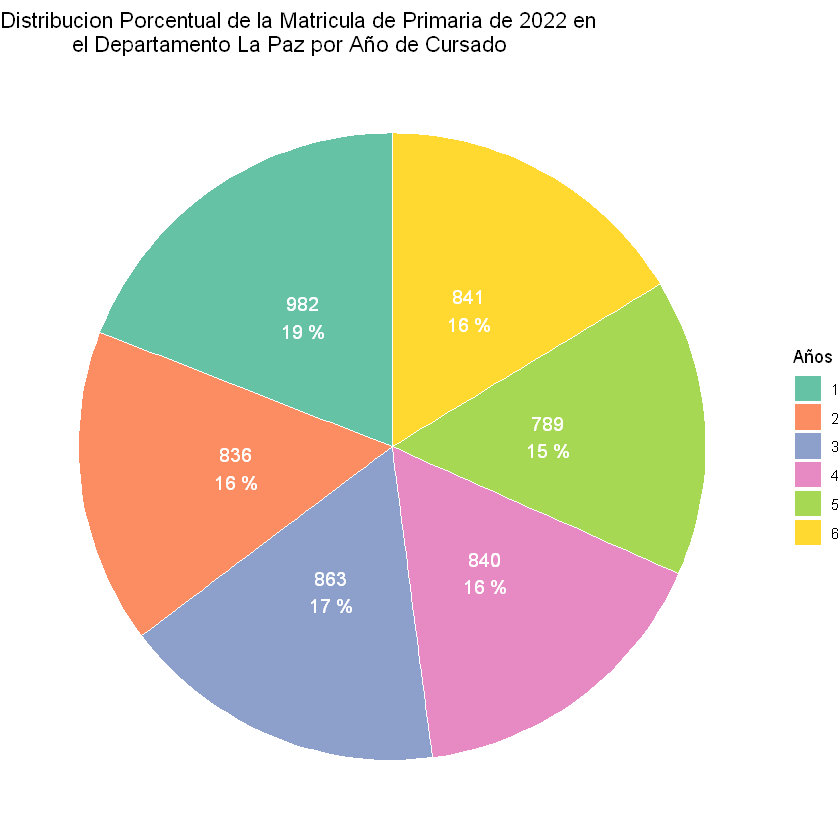

In [361]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Primaria de 2022 en
            el Departamento La Paz por Año de Cursado")

### Secundaria

In [362]:
sectores_secu<-filter(dataset_mas_limpio_matricula, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Secundaria")

In [363]:
pie <- round(100 * table(sectores_secu$AñoCursado) / length(sectores_secu$AñoCursado))
pie
porc <- c(pie)
frec<- c(table(sectores_secu$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)


 1  2  3  4  5  6 
20 19 19 17 13 12 

frec,porc
892,20
844,19
849,19
763,17
590,13
561,12


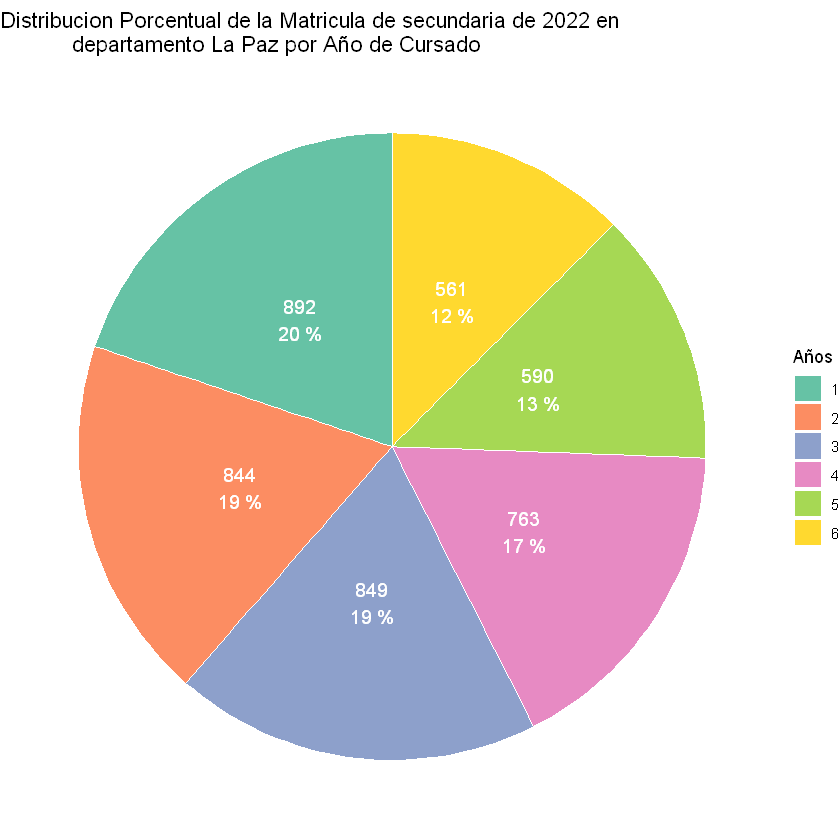

In [364]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de secundaria de 2022 en
            departamento La Paz por Año de Cursado")

### Distribución por turno 

### Primaria

In [365]:
sector_por_turno_p <- filter(dataset_mas_limpio_matricula, Modalidad == 'Primaria')

In [366]:
sector_por_turno_p$turno <- ifelse(sector_por_turno_p$turno %in% c("INTERMEDIO", "ROTATIVO", "COMPLETO"), "OTROS", sector_por_turno_p$turno)
ftable(sector_por_turno_p$turno)

 MAÑANA OTROS TARDE
                   
   1924   258  2969

In [367]:
pie <- round(100 * table(sector_por_turno_p$turno) / length(sector_por_turno_p$turno))
porc <- c(pie)
frec <- c(table(sector_por_turno_p$turno))
D1 <- data.frame(frec, porc)
rownames(D1) <- names(table(sector_por_turno_p$turno))
D1
turnos<-rownames(D1)

,frec,porc
MAÑANA,1924,37
OTROS,258,5
TARDE,2969,58


In [368]:
pie <- round(100 * table(sector_por_turno_p$turno) / length(sector_por_turno_p$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_p$turno))
D1<-data.frame(frec,porc)
D1
turnos<-rownames(D1)


MAÑANA  OTROS  TARDE 
    37      5     58 

,frec,porc
MAÑANA,1924,37
OTROS,258,5
TARDE,2969,58


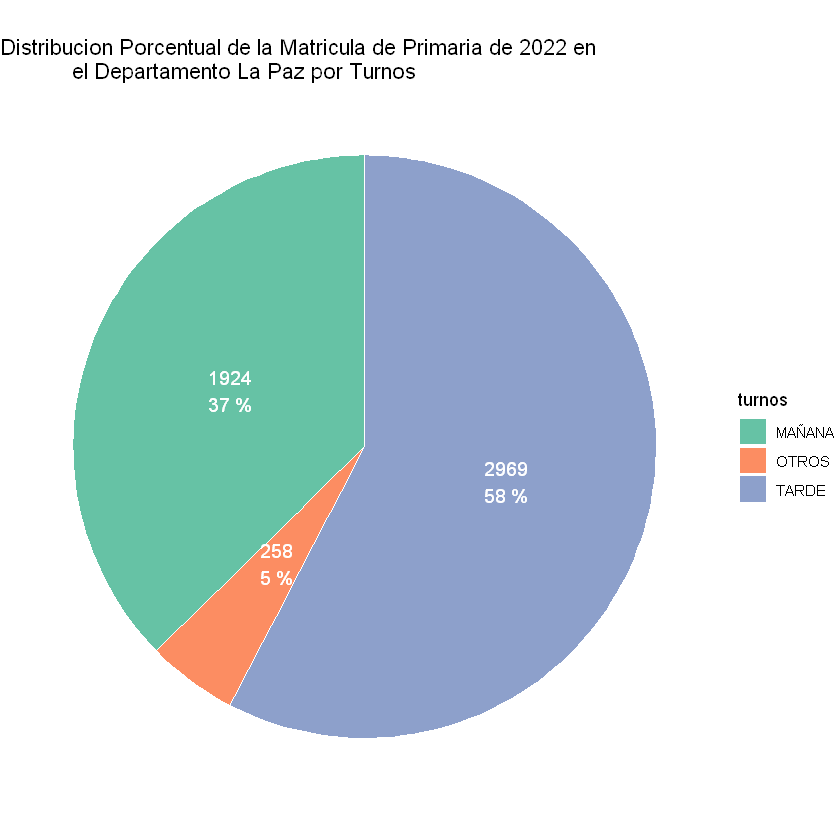

In [369]:
ggplot(D1, aes(x="", y=frec, fill=turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.50))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Primaria de 2022 en
            el Departamento La Paz por Turnos")

### Secundaria

In [370]:
sector_por_turno_s <- filter(dataset_mas_limpio_matricula, Modalidad == 'Secundaria')
ftable(sector_por_turno_s$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     79   3175    51       12  1234         17

In [371]:
sector_por_turno_s$turno <- ifelse(sector_por_turno_s$turno %in% c("DIURNO", "NOCHE", "ROTATIVO","VESPERTINO"), "OTROS", sector_por_turno_s$turno)
ftable(sector_por_turno_p$turno)
pie <- round(100 * table(sector_por_turno_s$turno) / length(sector_por_turno_s$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_s$turno))
D1<-data.frame(frec,porc)
D1
Turnos<-rownames(D1)

 MAÑANA OTROS TARDE
                   
   1924   258  2969


MAÑANA  OTROS  TARDE 
    70      3     27 

,frec,porc
MAÑANA,3175,70
OTROS,159,3
TARDE,1234,27


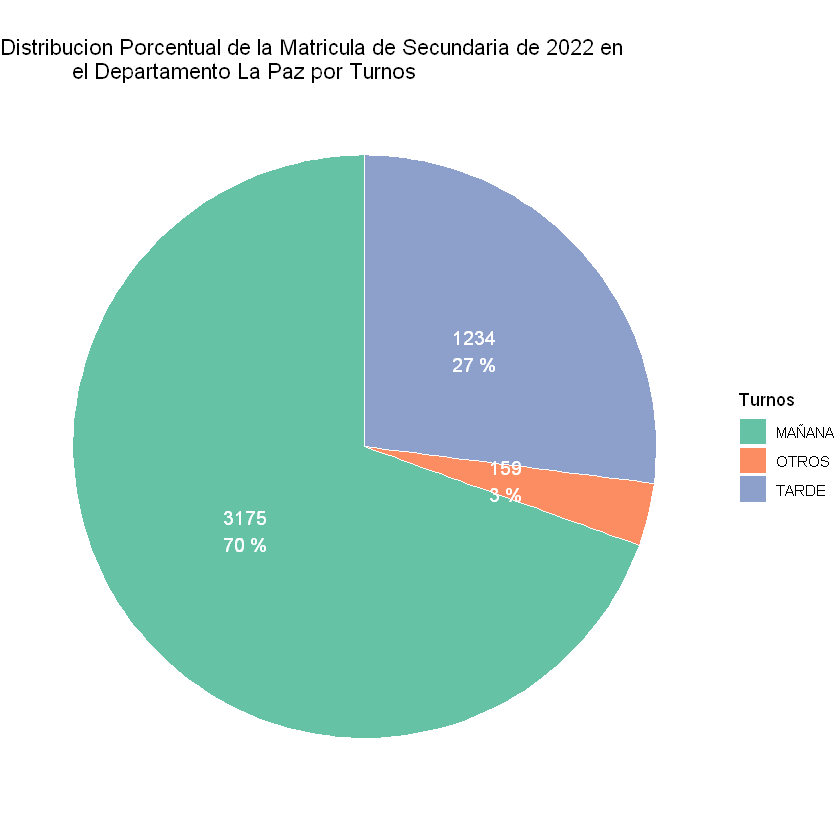

In [372]:
ggplot(D1, aes(x="", y=frec, fill=Turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Secundaria de 2022 en
            el Departamento La Paz por Turnos")

# Distribucion por sector publico y privado


FALSE  TRUE 
 4532   619 

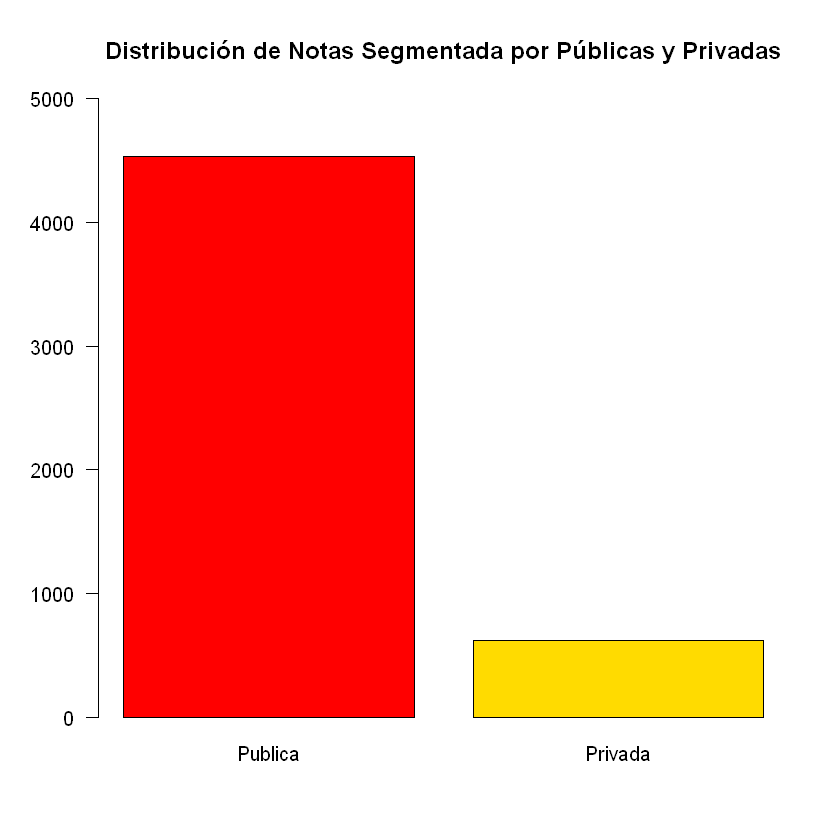

In [373]:
#Gráfico de barras de frecuencia absoluta
nombres <- c("Publica", "Privada")
escu_primaria <- filter(dataset_mas_limpio_matricula,Modalidad == "Primaria")
tabla <- table(escu_primaria$EsPrivada)
tabla
#barplot(tabla,main="Distribucion segmentado por publicas y privadas",col=rainbow(6),ylim=c(0,30000),las=2)
# Crear el gráfico de barras con nombres de columnas
barplot(tabla, 
        main = "Distribución de Notas Segmentada por Públicas y Privadas",
        col = rainbow(7), 
        ylim = c(0, 5000), 
        las = 1,
        names.arg = nombres)

In [374]:
sector_pp <- filter(dataset_mas_limpio_matricula, Modalidad == 'Primaria')
pie <- round(100 * table(sector_pp$EsPrivada) / length(sector_pp$EsPrivada))
pie
porc <- c(pie)
frec<- c(table(sector_pp$EsPrivada))
D1<-data.frame(frec,porc)
D1

Sector<-rownames(D1)


FALSE  TRUE 
   88    12 

,frec,porc
FALSE,4532,88
TRUE,619,12


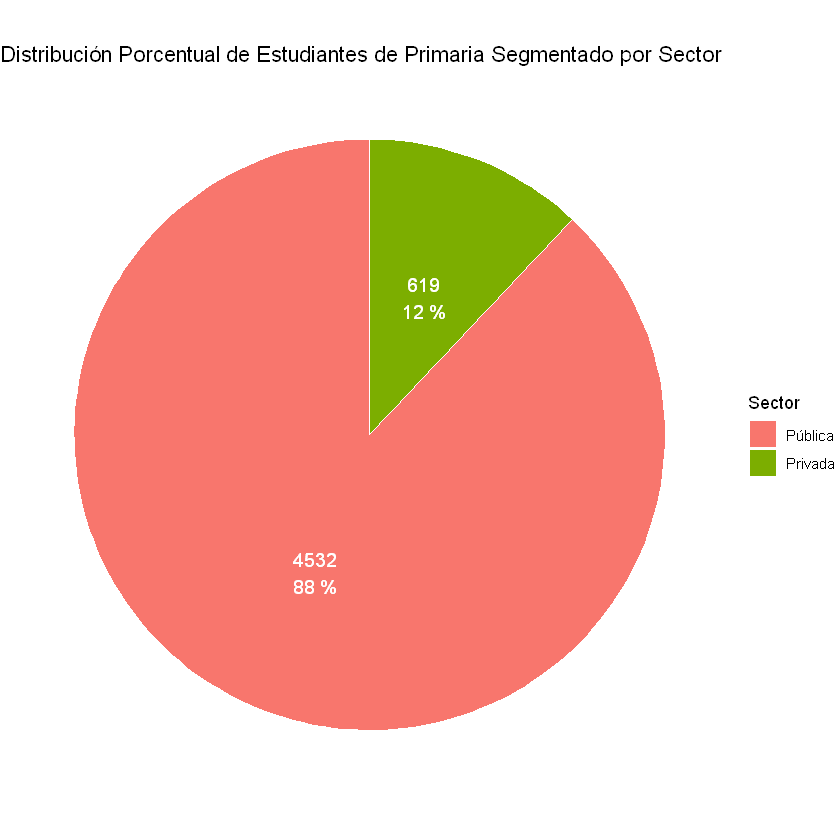

In [375]:
ggplot(D1, aes(x="", y=frec, fill=Sector)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
    scale_fill_manual(values=c("#F8766D", "#7CAE00"), labels=c("Pública","Privada"))+
  #scale_fill_brewer(palette="Set2")+
  labs(title="Distribución Porcentual de Estudiantes de Primaria Segmentado por Sector")



In [376]:
escu_secu<- filter(dataset_mas_limpio_matricula, Modalidad == 'Secundaria')
pie <- round(100 * table(escu_secu$EsPrivada) / length(escu_secu$EsPrivada))
pie
porc <- c(pie)
frec<- c(table(escu_secu$EsPrivada))
D1_s<-data.frame(frec,porc)
D1_s

Sector<-rownames(D1_s)


FALSE  TRUE 
   83    17 

,frec,porc
FALSE,3812,83
TRUE,756,17


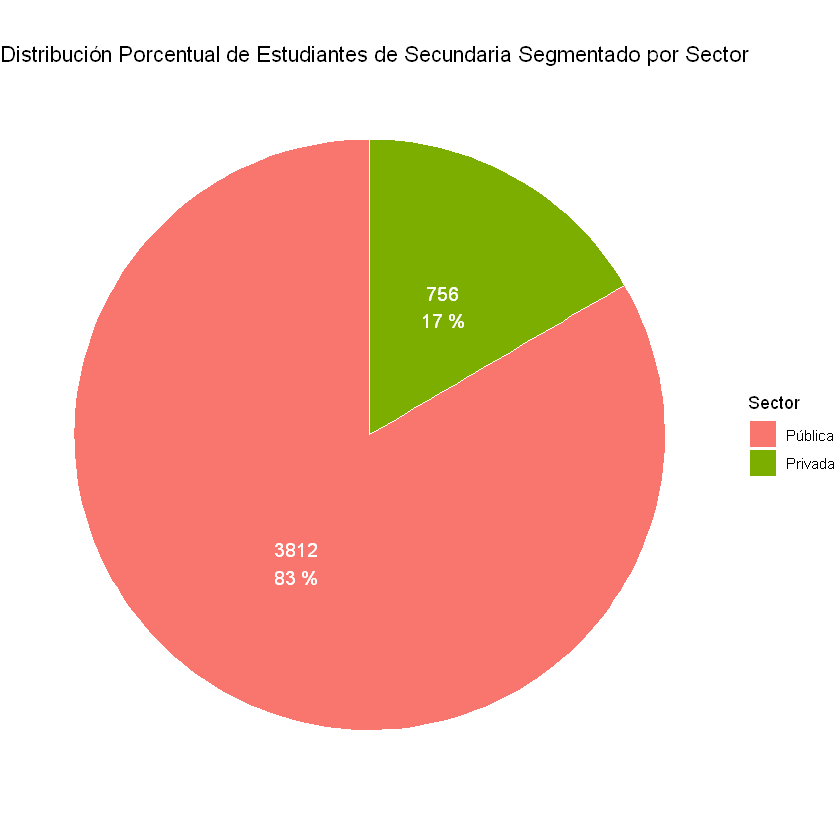

In [377]:
ggplot(D1_s, aes(x="", y=frec, fill=Sector)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
    scale_fill_manual(values=c("#F8766D", "#7CAE00"), labels=c("Pública","Privada"))+
  #scale_fill_brewer(palette="Set2")+
  labs(title="Distribución Porcentual de Estudiantes de Secundaria Segmentado por Sector")

# Segmentado por nivel, año y materia de la variable promedio

### Materia matemática, primer año - Primaria

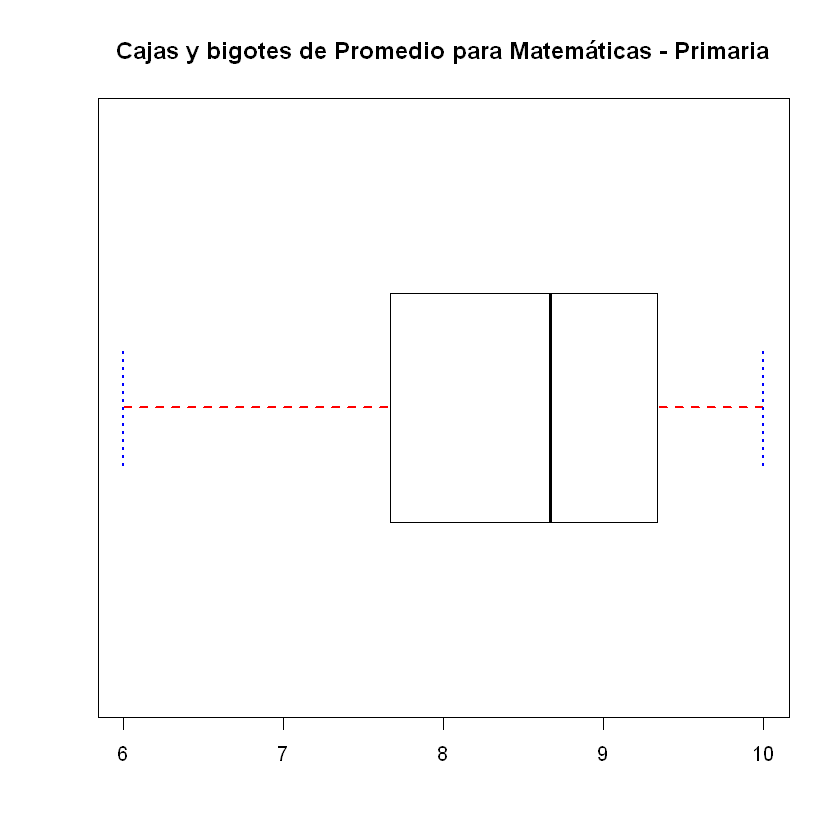

In [378]:
primaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="MATEMÁTICA" & Modalidad == "Primaria")

boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y bigotes de Promedio para Matemáticas - Primaria", # Tìtulo
        horizontal = TRUE
       )

### Materia Lengua, primer año - Primaria

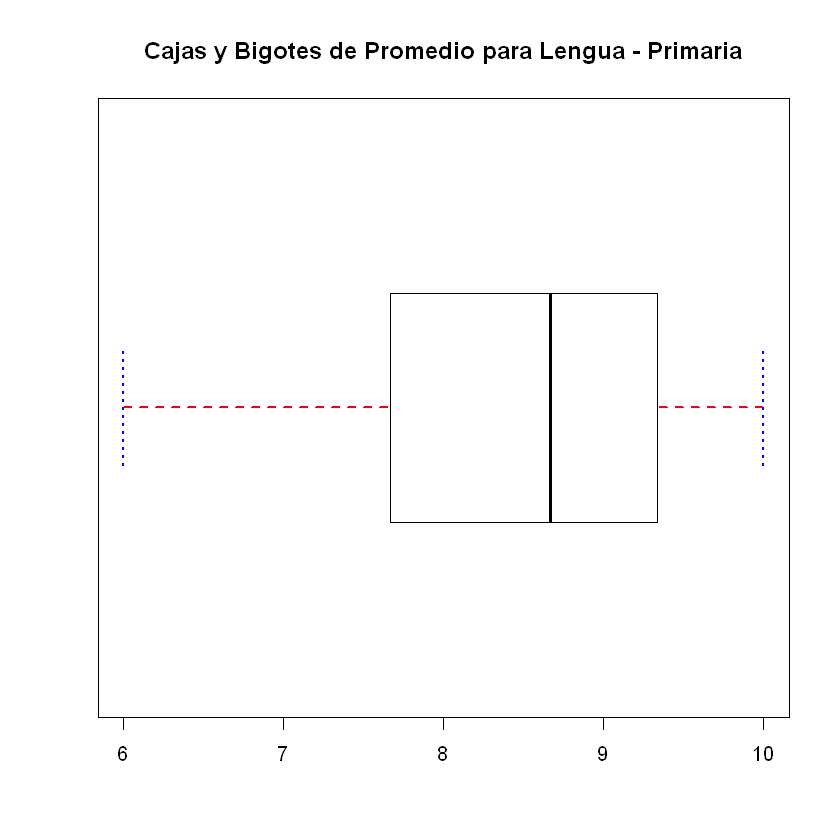

In [379]:
primaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA" & Modalidad == "Primaria")

boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Lengua - Primaria", # Tìtulo
        horizontal = TRUE
       )

### Materia matemática, primer año - Secundaria



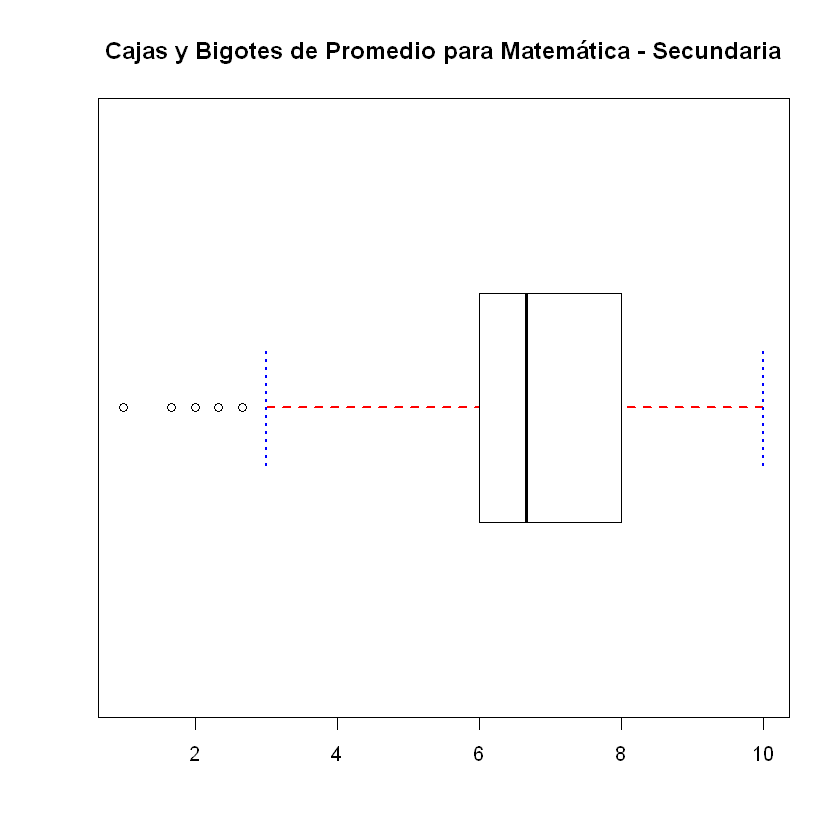

In [380]:
secundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Matemática - Secundaria", # Tìtulo
        horizontal = TRUE
       )

### Materia Lengua y Literatura, primer año - Secundaria

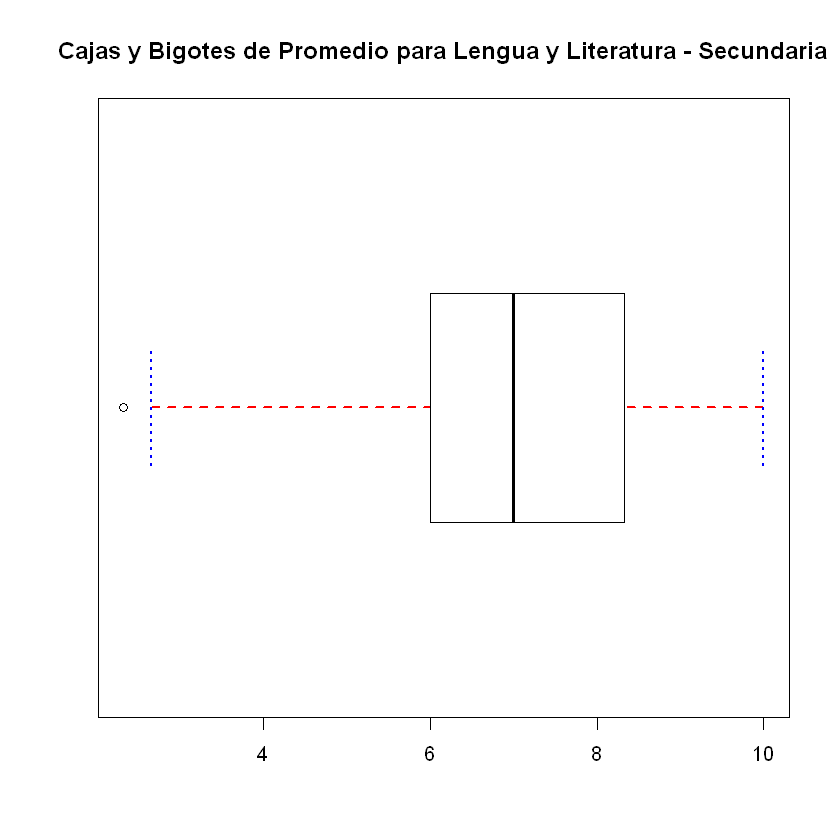

In [381]:
secundaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA Y LITERATURA" & Modalidad == "Secundaria")

boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Lengua y Literatura - Secundaria", # Tìtulo
        horizontal = TRUE
       )

## Histogramas segmentados por nivel, año y materia de la variable promedio para matemática y lengua

## Primaria
### Materia: matemática

[1] "Año cursado: 1"
[1] "Año cursado: 2"


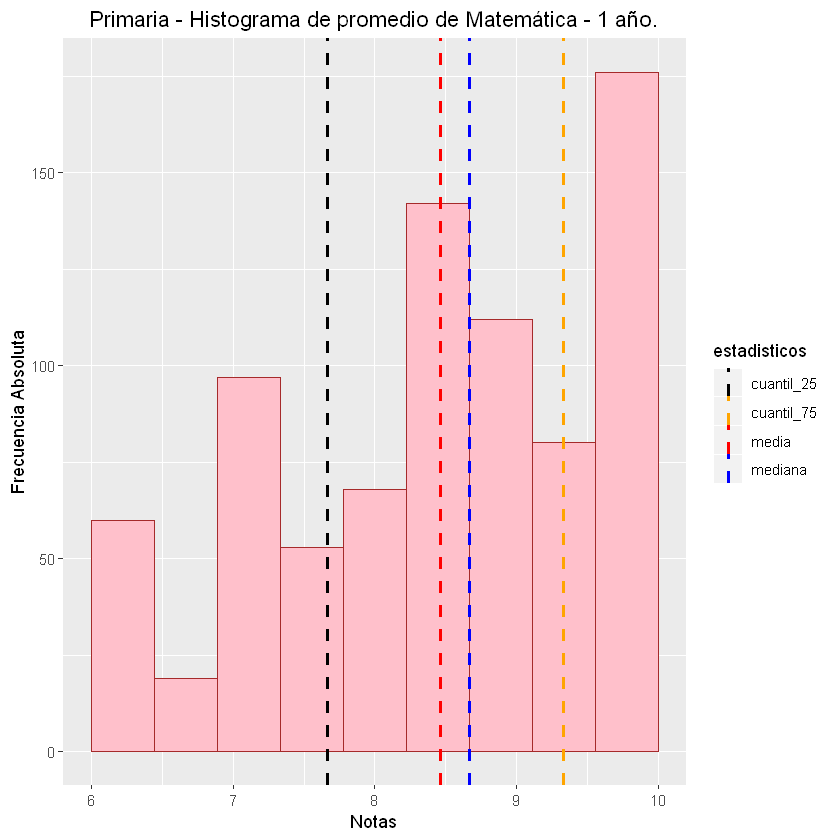

[1] "Año cursado: 3"


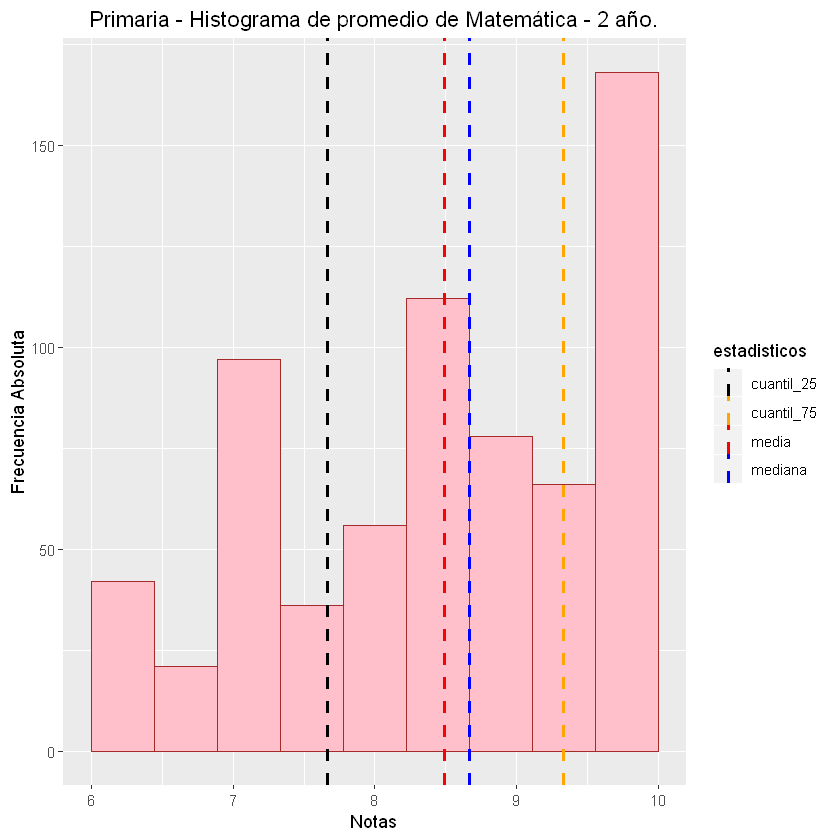

[1] "Año cursado: 4"


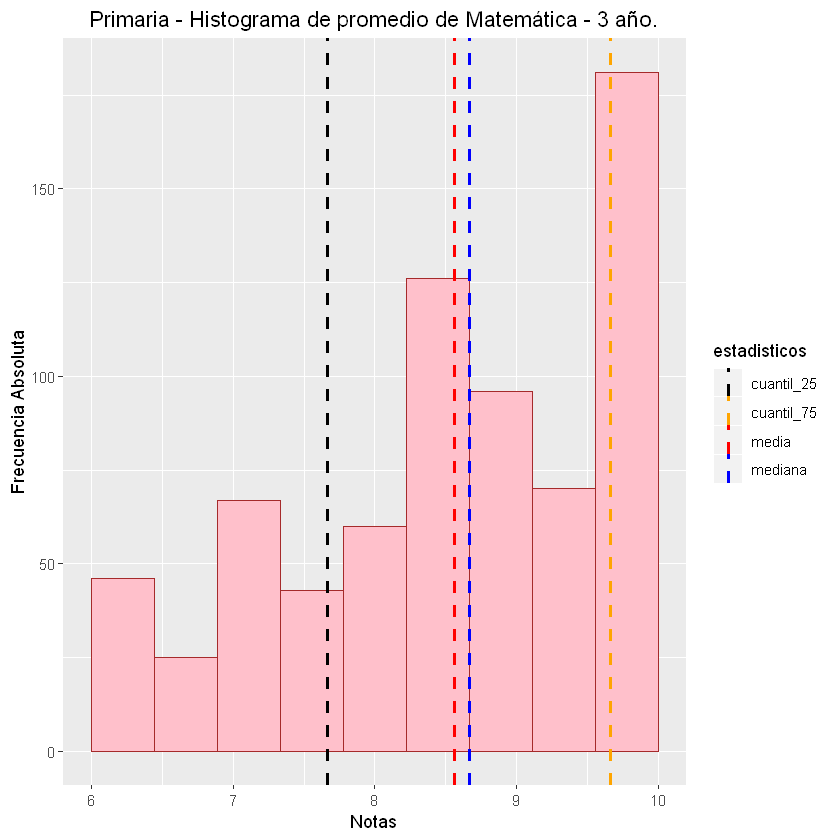

[1] "Año cursado: 5"


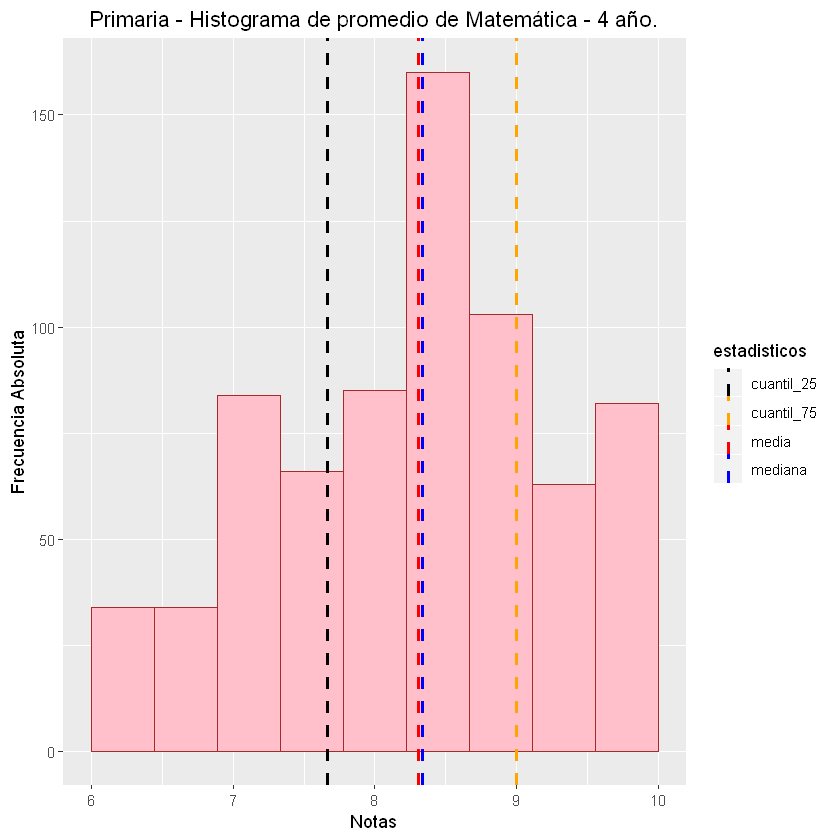

[1] "Año cursado: 6"


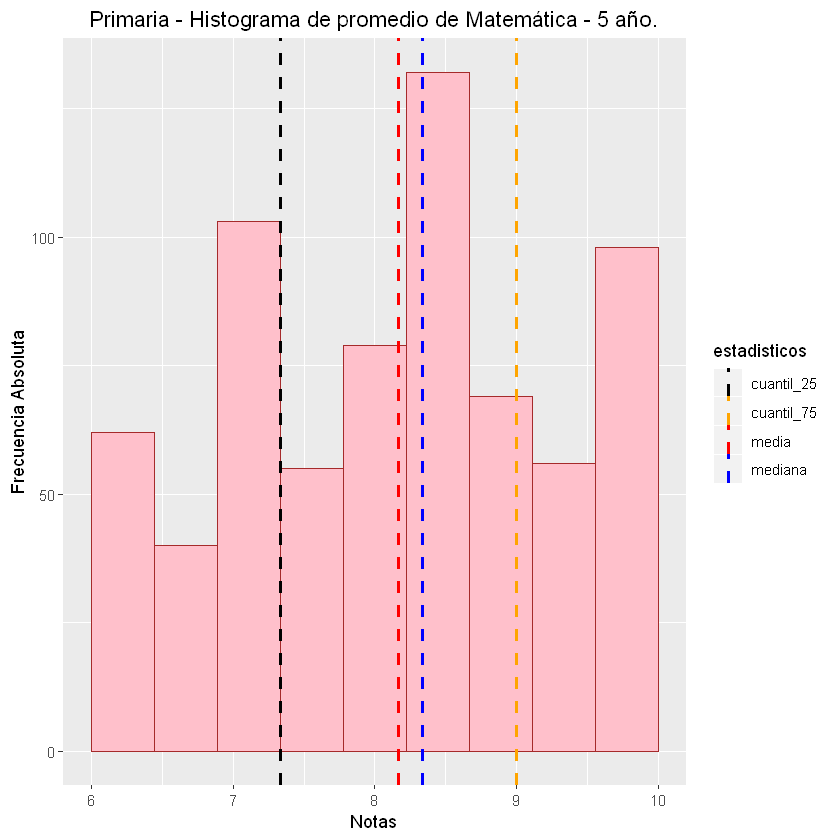

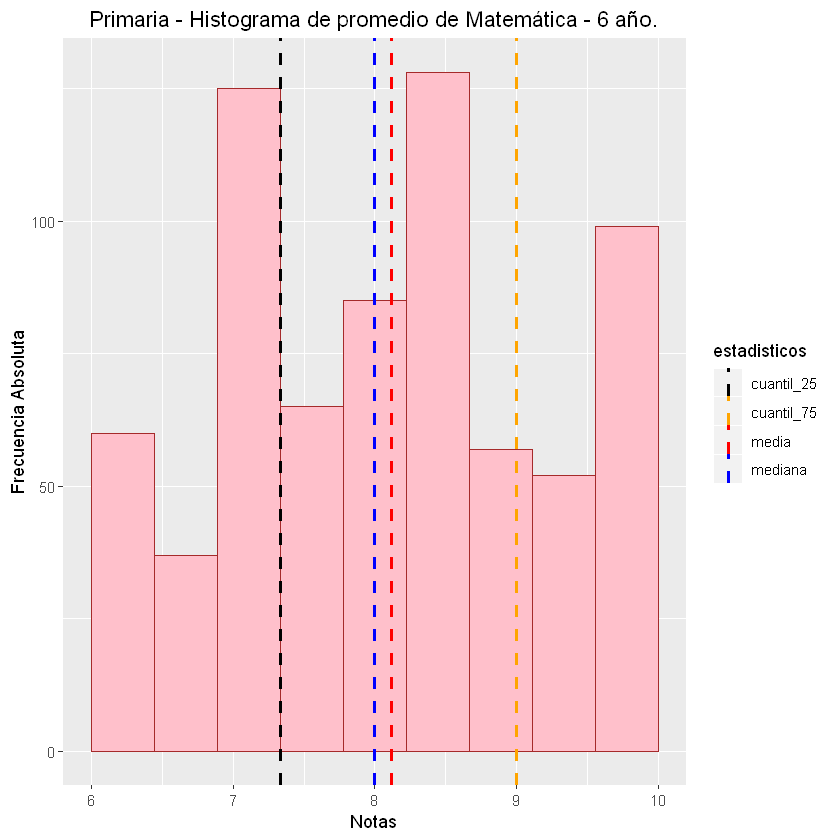

In [382]:
for (i in 1:6)
{
    print(paste0("Año cursado: ", i))
    primaria_mat <- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "MATEMÁTICA" & Modalidad == 'Primaria')
    histo_p_1 <- fdt(primaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_p <- ggplot(primaria_mat[!is.na(primaria_mat$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="matemática", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
    ggtitle(paste0("Primaria - Histograma de promedio de Matemática - ", i, " año.")) +
   theme(plot.title = element_text(hjust = 0.5))
    print(histo_p)
}


### Materia: Lengua

[1] "Año cursado: 1"
[1] "Año cursado: 2"


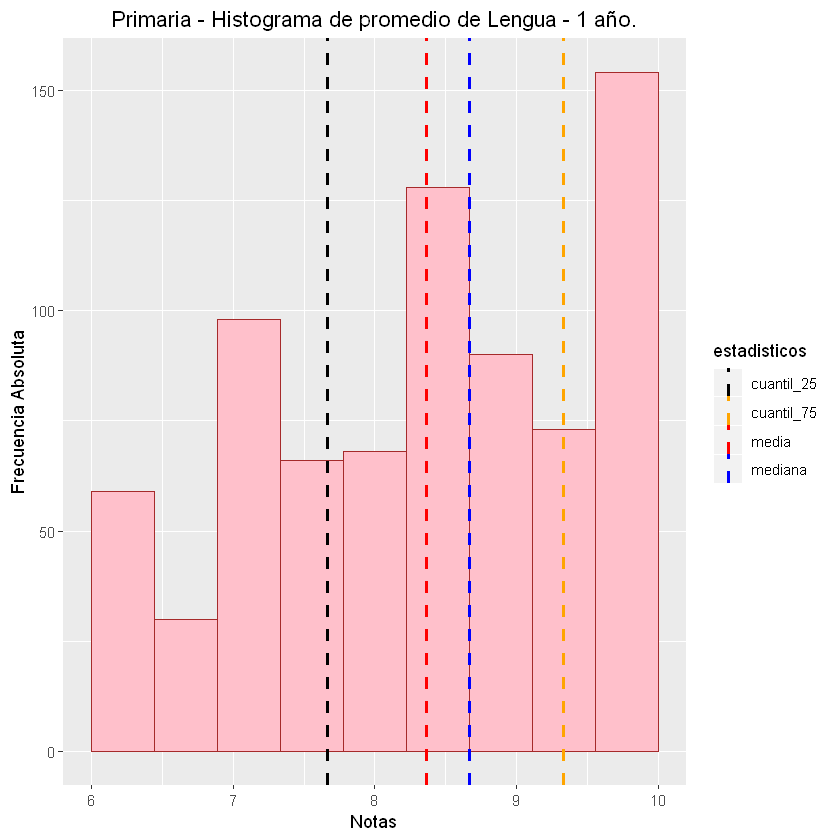

[1] "Año cursado: 3"


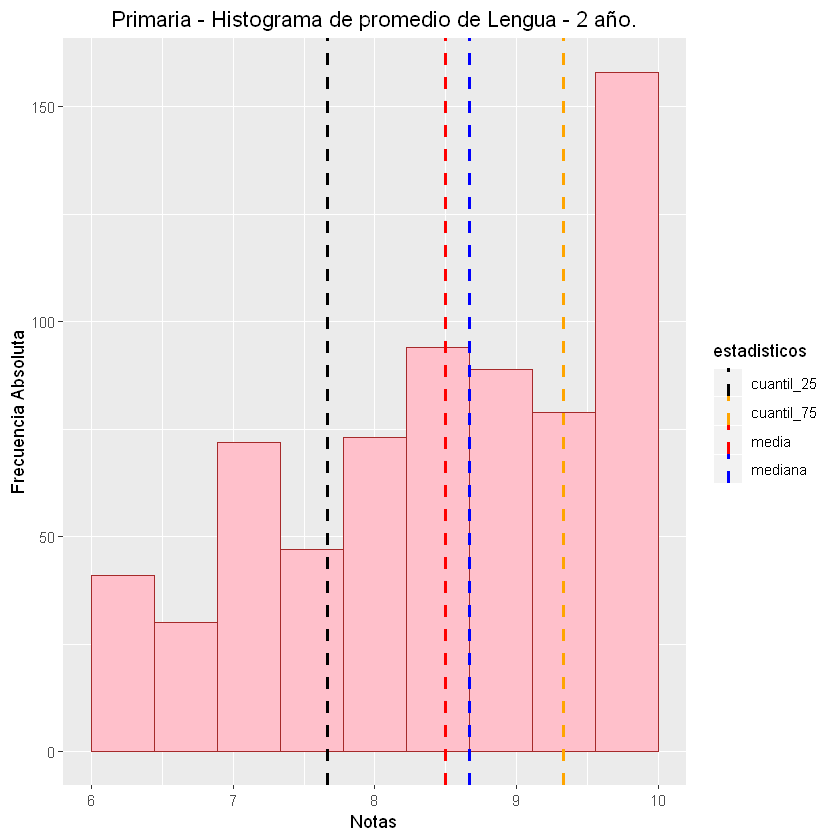

[1] "Año cursado: 4"


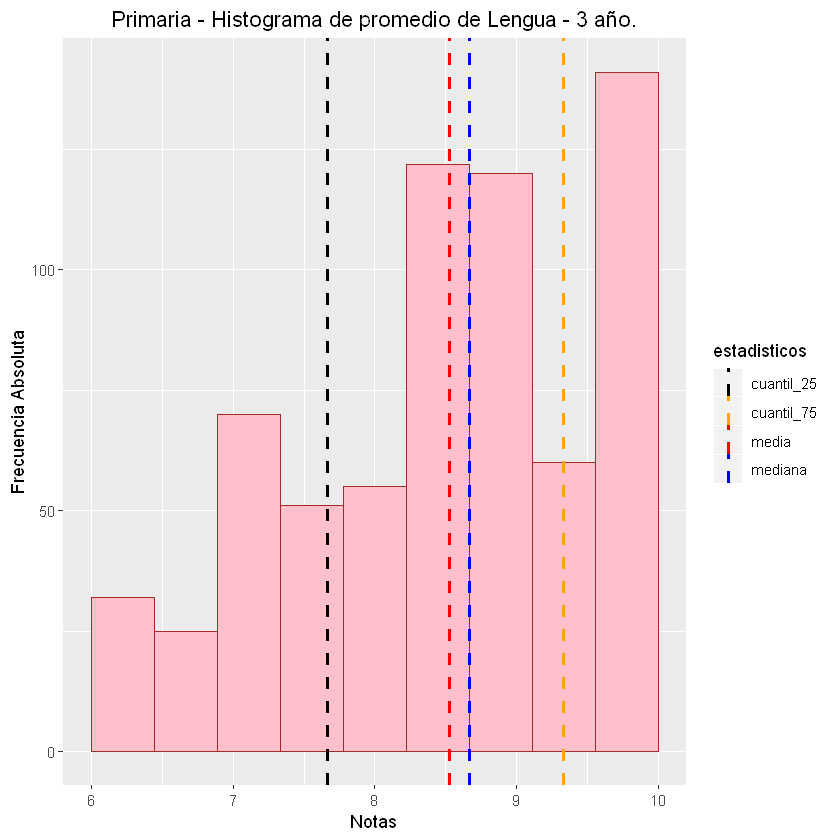

[1] "Año cursado: 5"


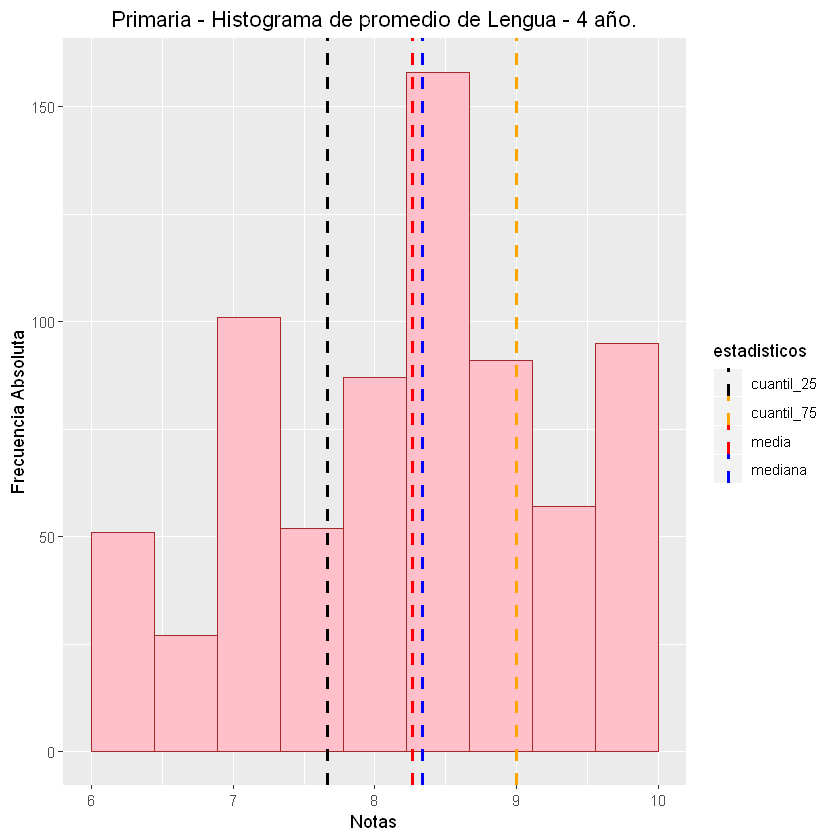

[1] "Año cursado: 6"


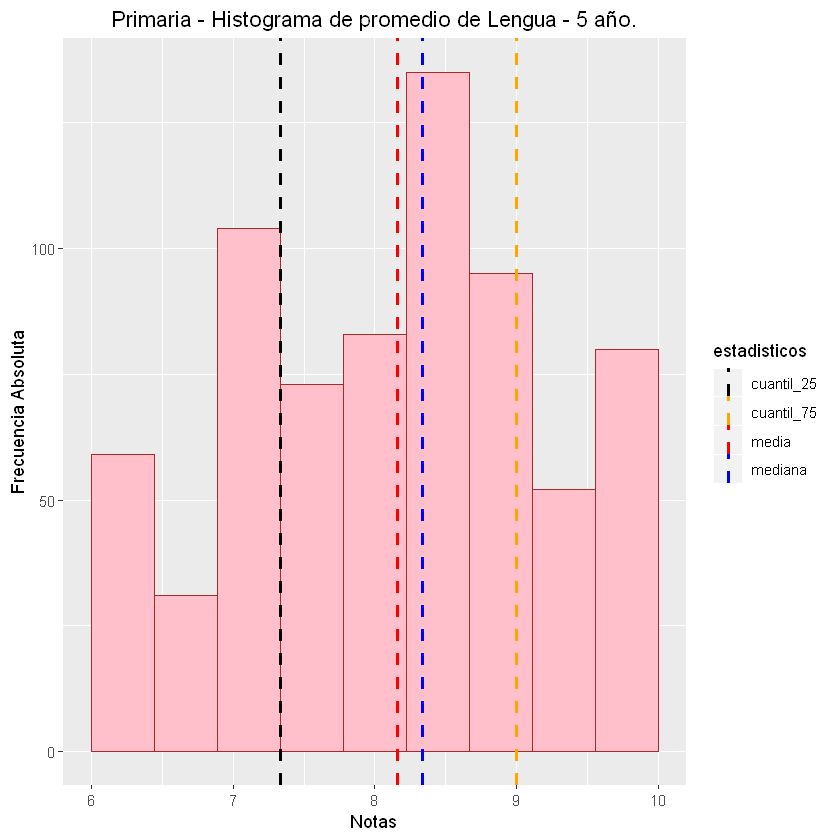

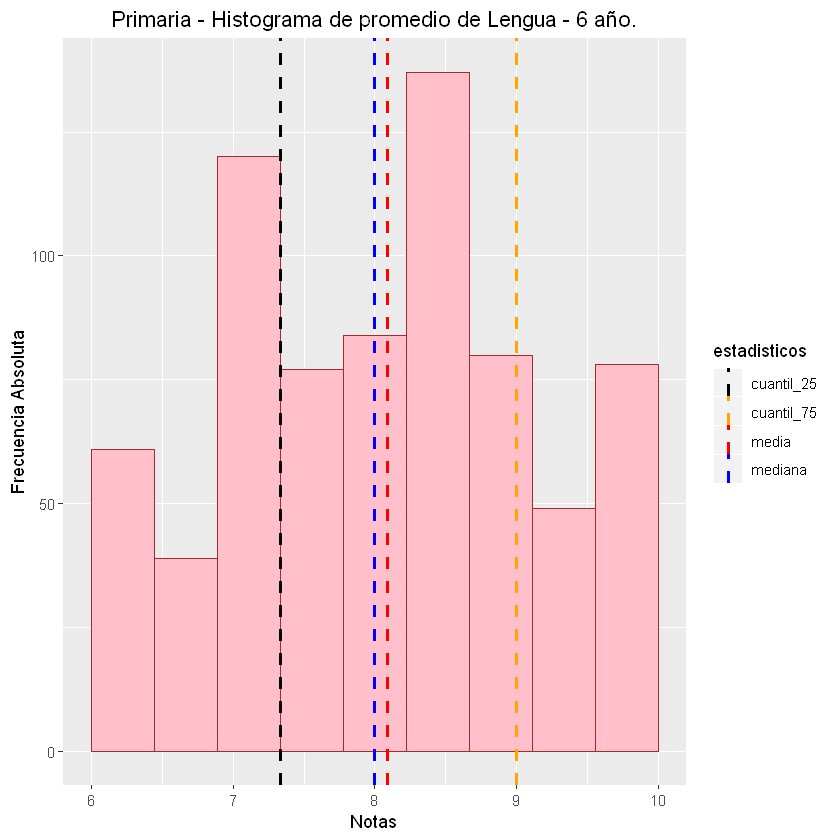

In [383]:
for (i in 1:6)
{
    print(paste0("Año cursado: ", i))
    primaria_len <- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "LENGUA" & Modalidad == 'Primaria')
    histo_p_1 <- fdt(primaria_len$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_p <- ggplot(primaria_len[!is.na(primaria_len$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="lengua", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
    ggtitle(paste0("Primaria - Histograma de promedio de Lengua - ", i, " año.")) +
   theme(plot.title = element_text(hjust = 0.5))
    print(histo_p)
}


## Secundaria
### Materia: matemática

[1] "Año cursado: 1"
[1] "Año cursado: 2"


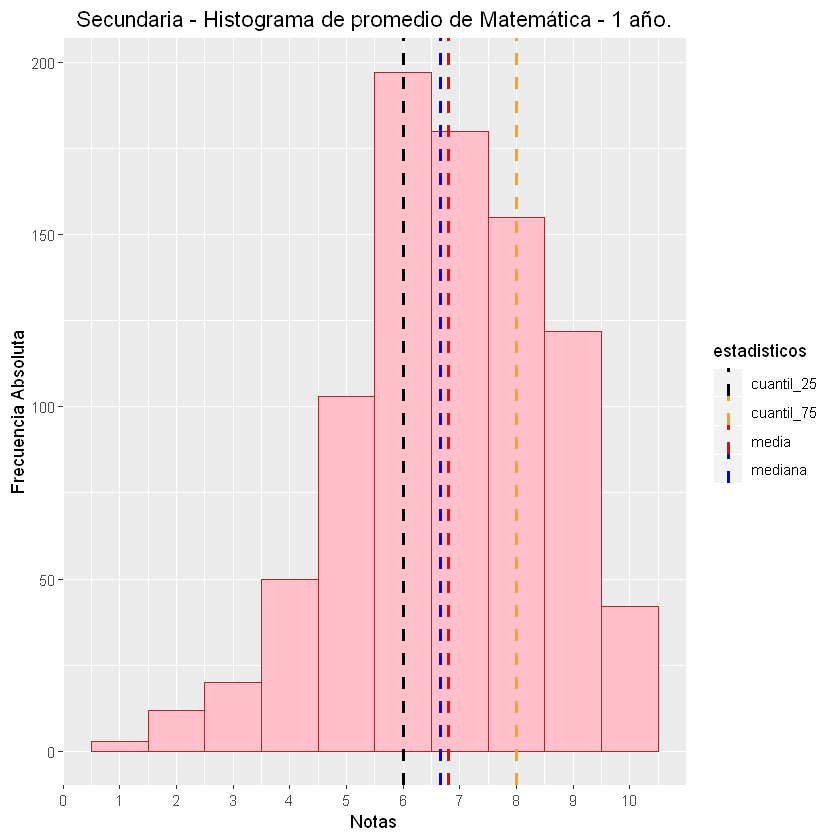

[1] "Año cursado: 3"


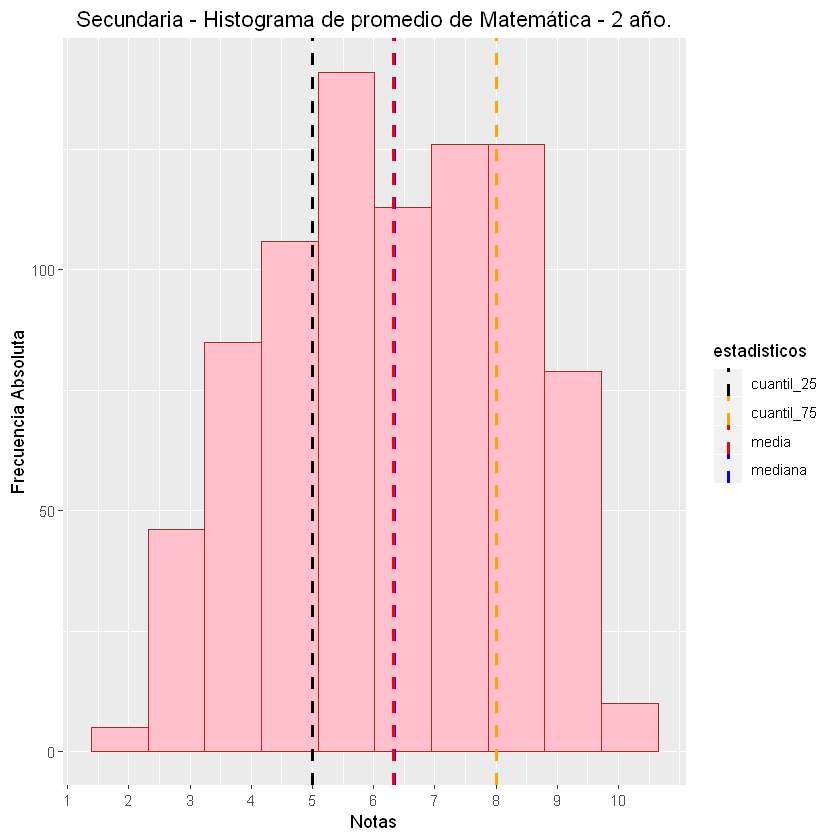

[1] "Año cursado: 4"


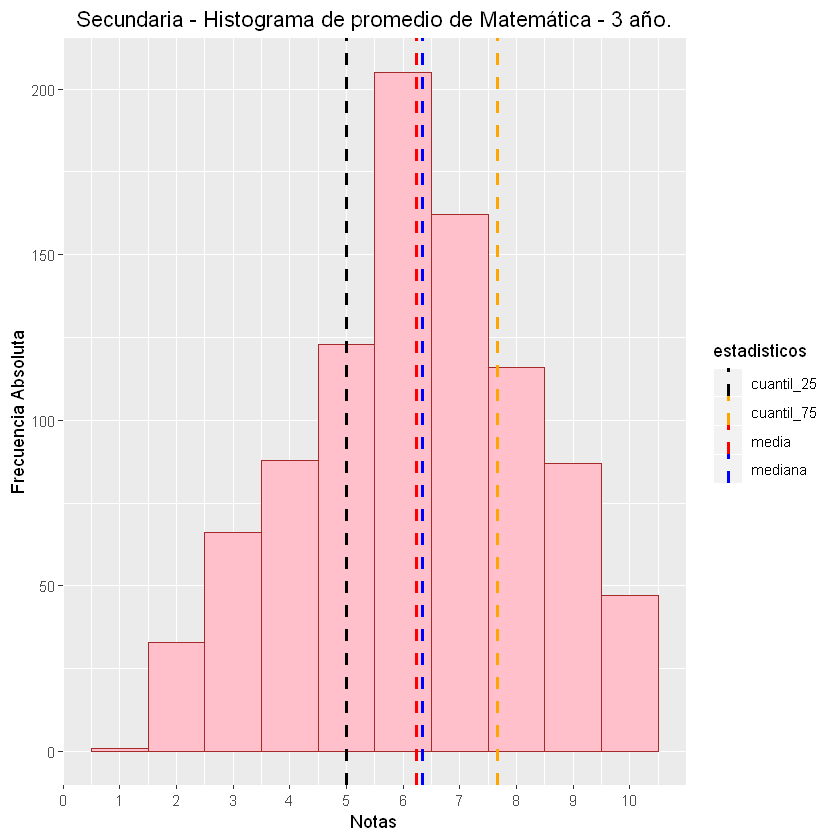

[1] "Año cursado: 5"


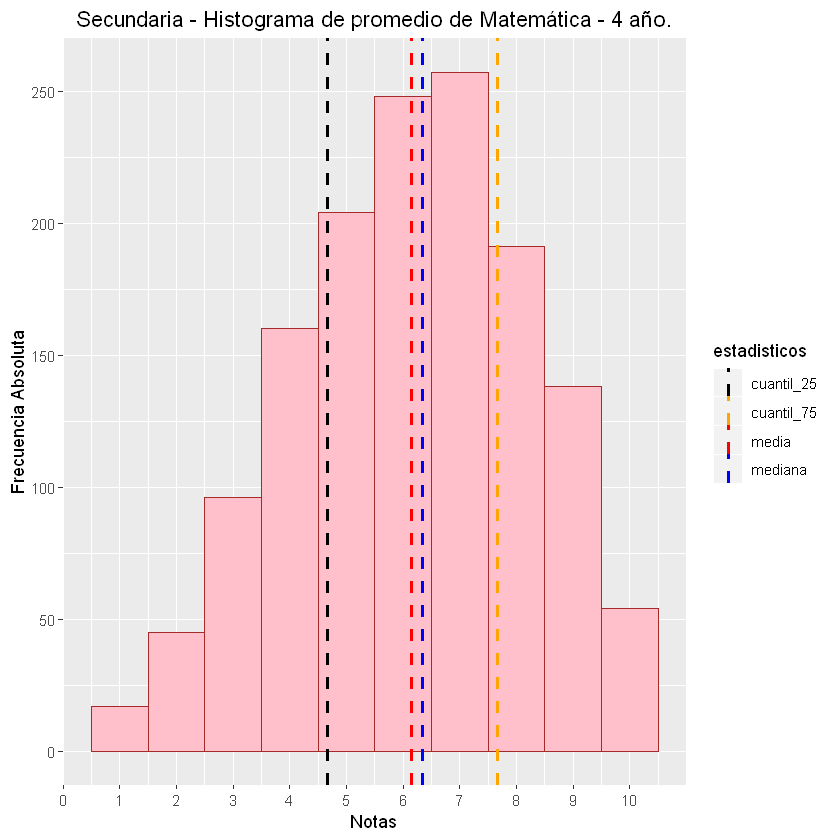

[1] "Año cursado: 6"


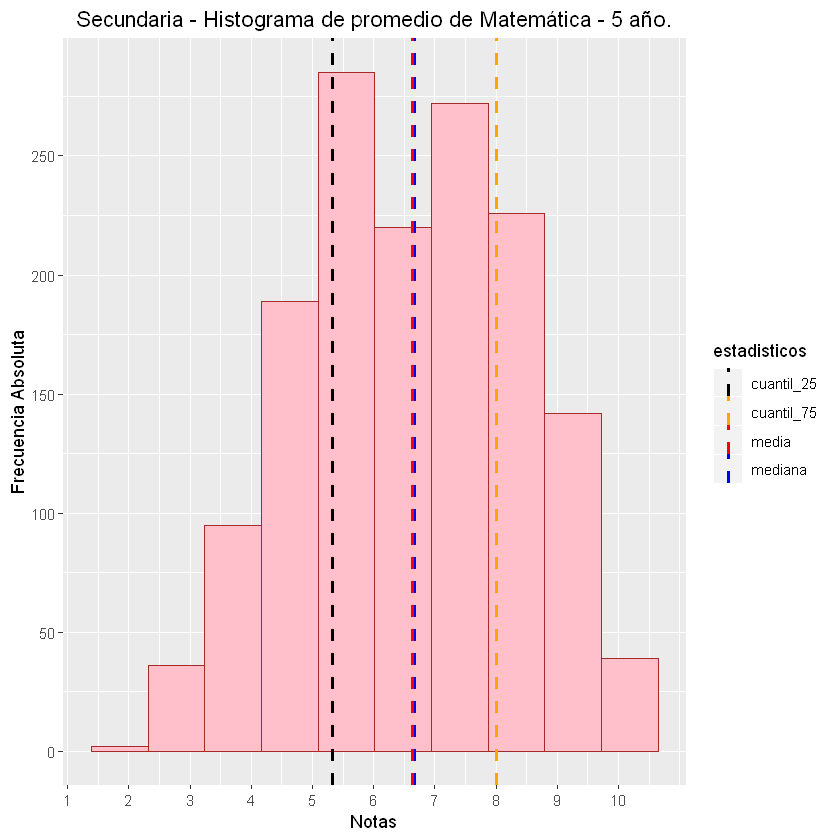

[1] "Año cursado: 7"


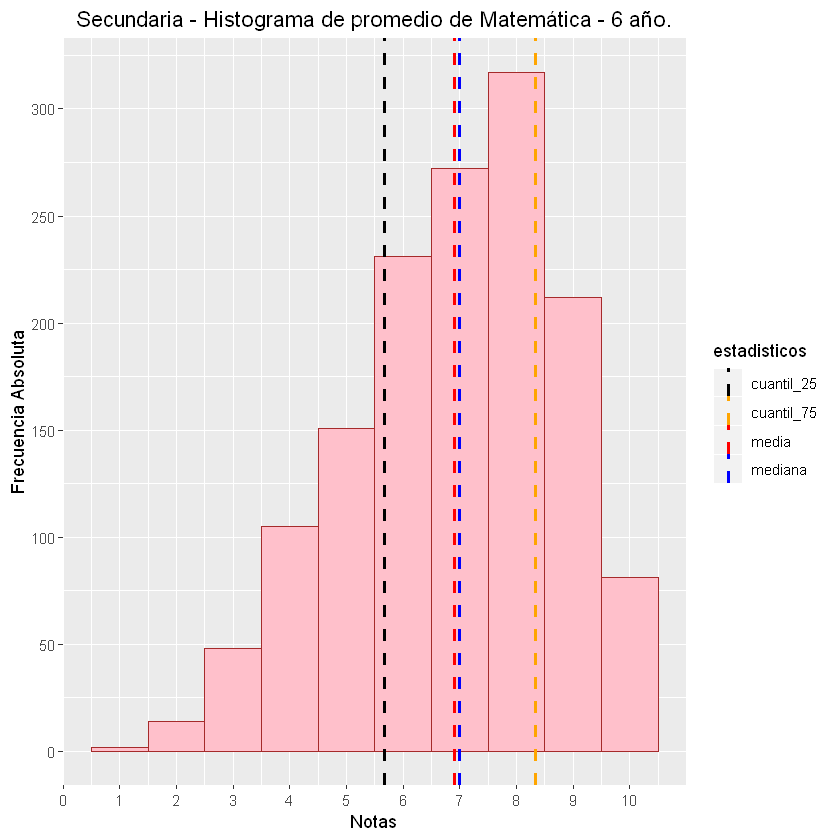

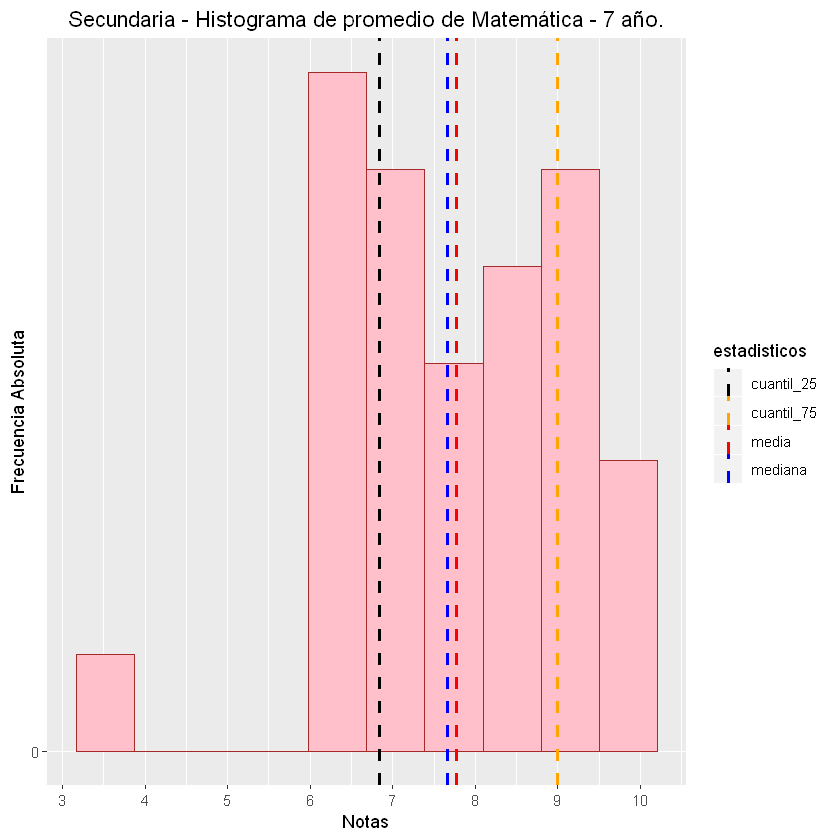

In [384]:
for (i in 1:7)
{
    print(paste0("Año cursado: ", i))
    secundaria_mat<- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "MATEMATICA" & Modalidad == 'Secundaria')
    histo_s_1 <- fdt(secundaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_s <- ggplot(secundaria_mat[!is.na(secundaria_mat$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="matematica", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
        ggtitle(paste0("Secundaria - Histograma de promedio de Matemática - ", i, " año.")) +
       theme(plot.title = element_text(hjust = 0.5))
    print(histo_s)
}

### Materia: Lengua y literatura

[1] "Año cursado: 1"
[1] "Año cursado: 2"


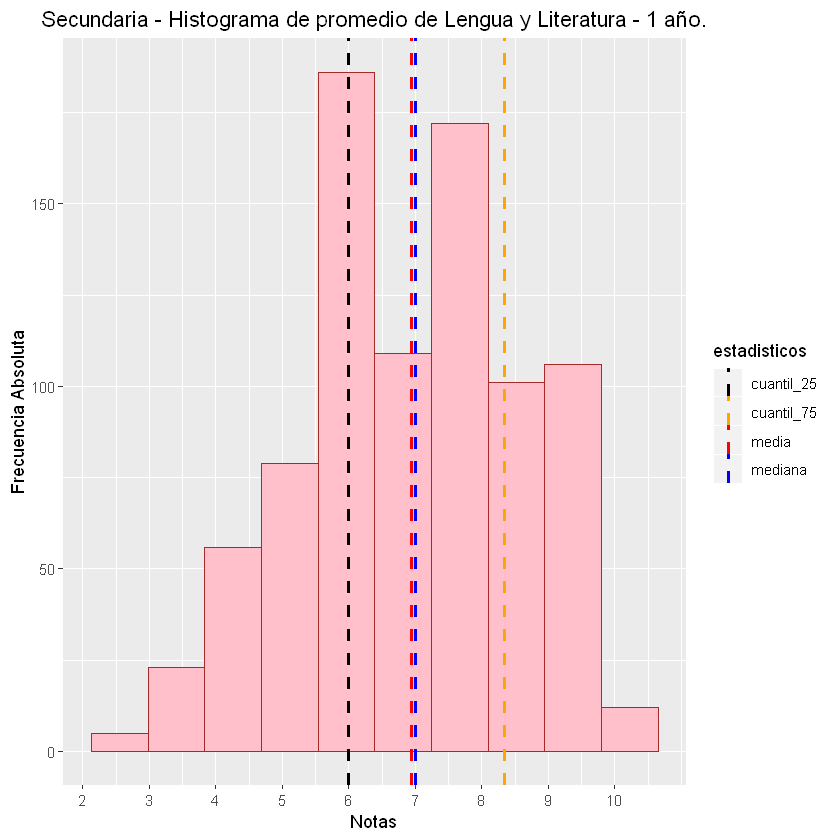

[1] "Año cursado: 3"


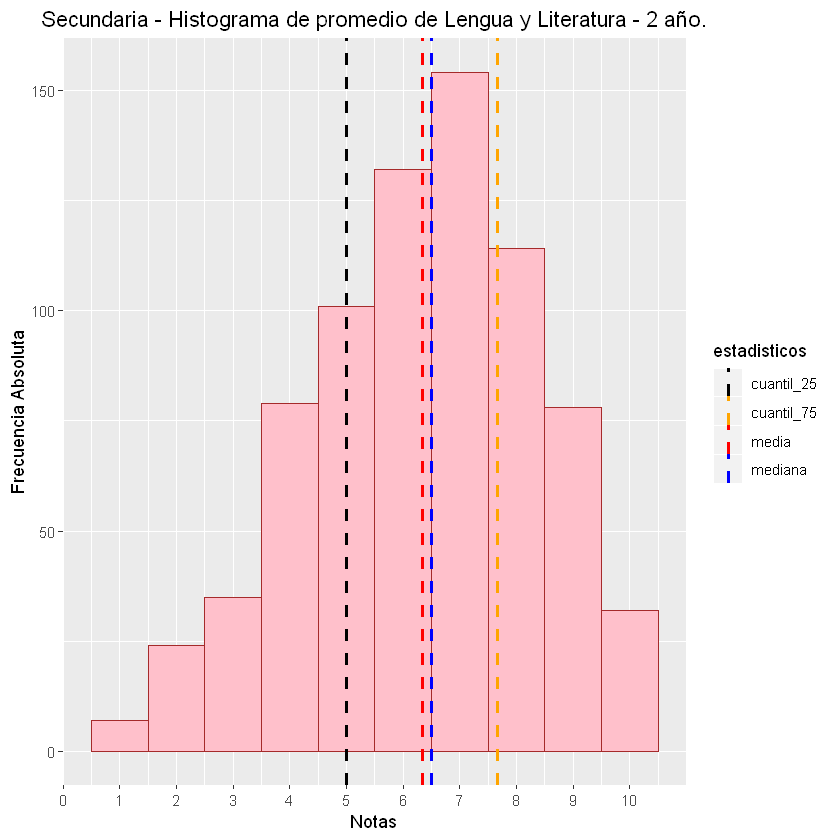

[1] "Año cursado: 4"


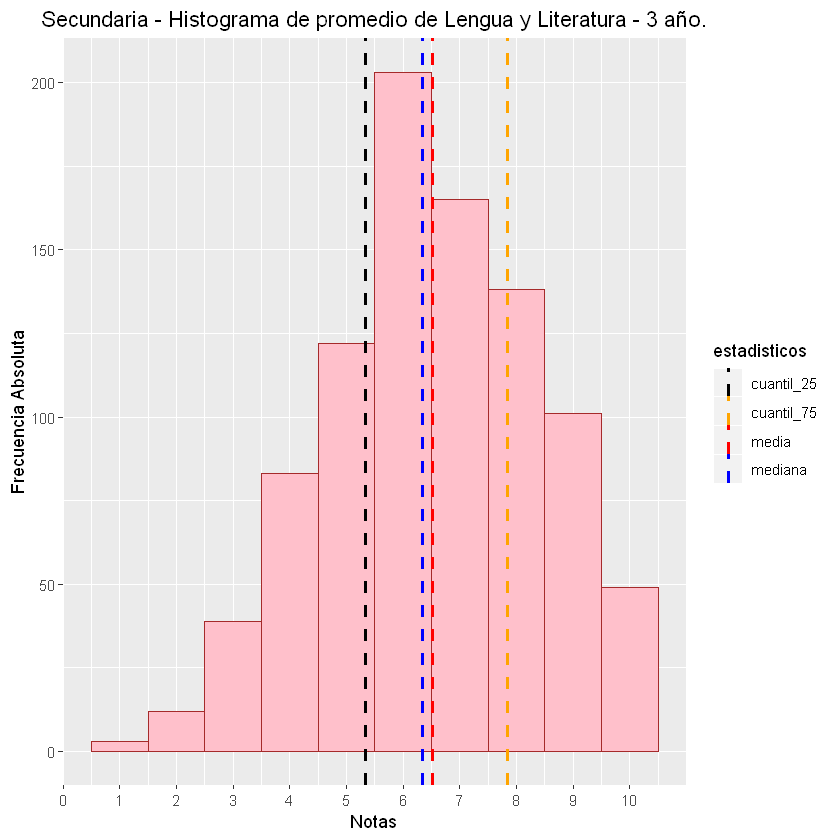

[1] "Año cursado: 5"


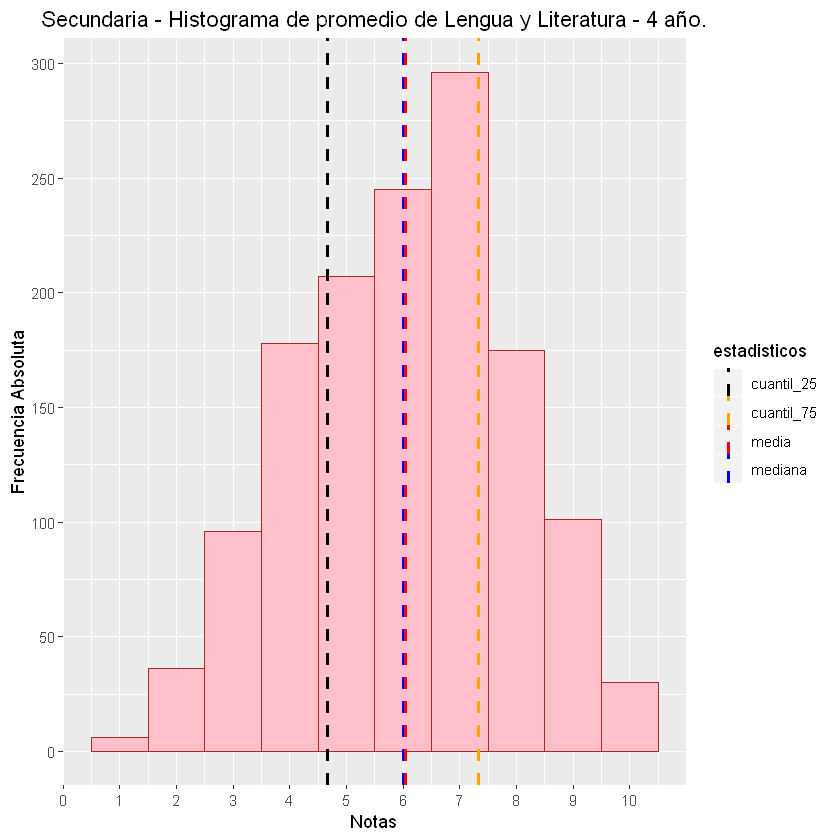

[1] "Año cursado: 6"


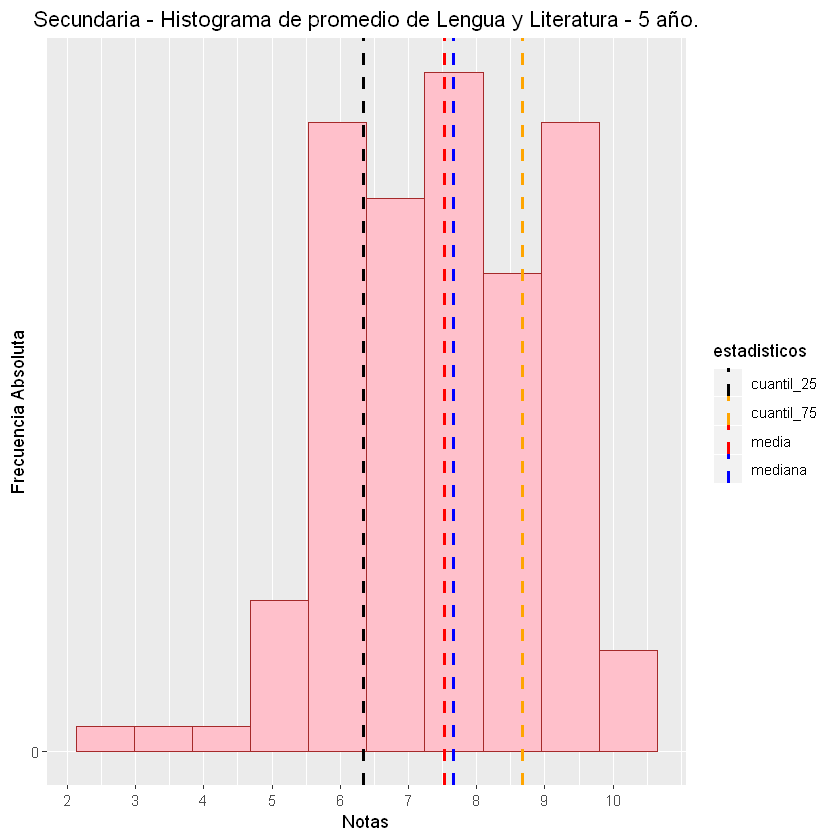

[1] "Año cursado: 7"


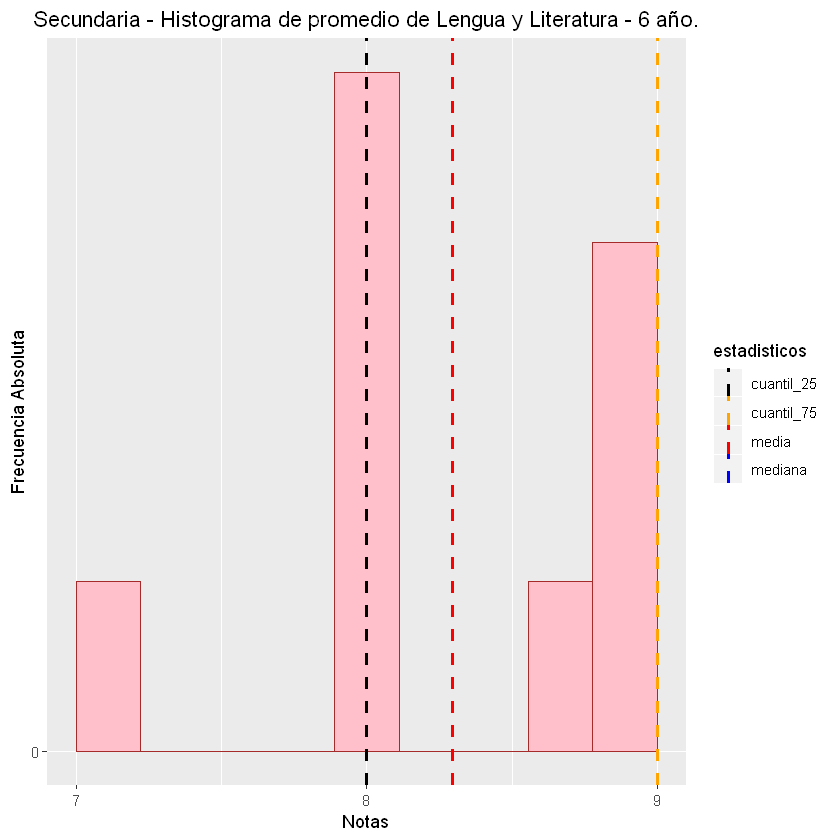

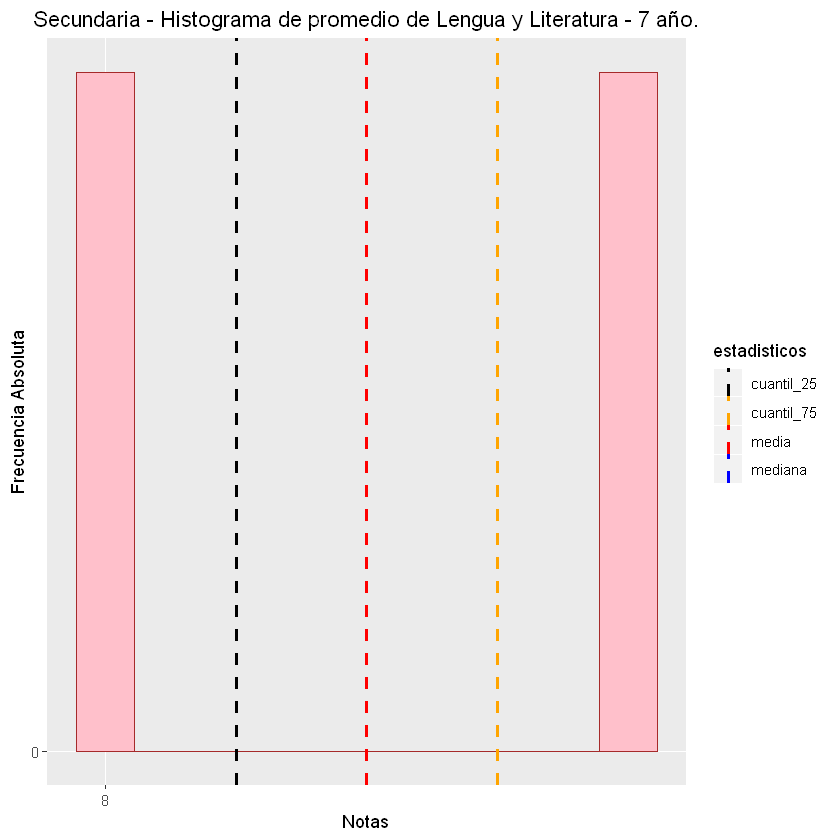

In [385]:
for (i in 1:7)
{
    print(paste0("Año cursado: ", i))
    secundaria_len<- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "LENGUA Y LITERATURA" & Modalidad == 'Secundaria')
    histo_s_1 <- fdt(secundaria_len$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_s <- ggplot(secundaria_len[!is.na(secundaria_len$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="Lengua y literatura", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
        ggtitle(paste0("Secundaria - Histograma de promedio de Lengua y Literatura - ", i, " año.")) +
       theme(plot.title = element_text(hjust = 0.5))
    print(histo_s)}


In [386]:
secundaria_len<- filter(dataset_mas_limpio, AñoCursado == 7 & asignatura == "LENGUA Y LITERATURA" & Modalidad == 'Secundaria')
ftable(secundaria_len$Promedio)

 8 8.33333333333333
                   
 1                1

## Guía 4

### a. ¿Son las correlaciones iguales?
### b. A partir de lo que vimos en teoría, 
### ¿usted podría informar todas las correlaciones comocorrelaciones lineales fuertes?
### c. ¿Qué importancia tiene el graficar los datos?

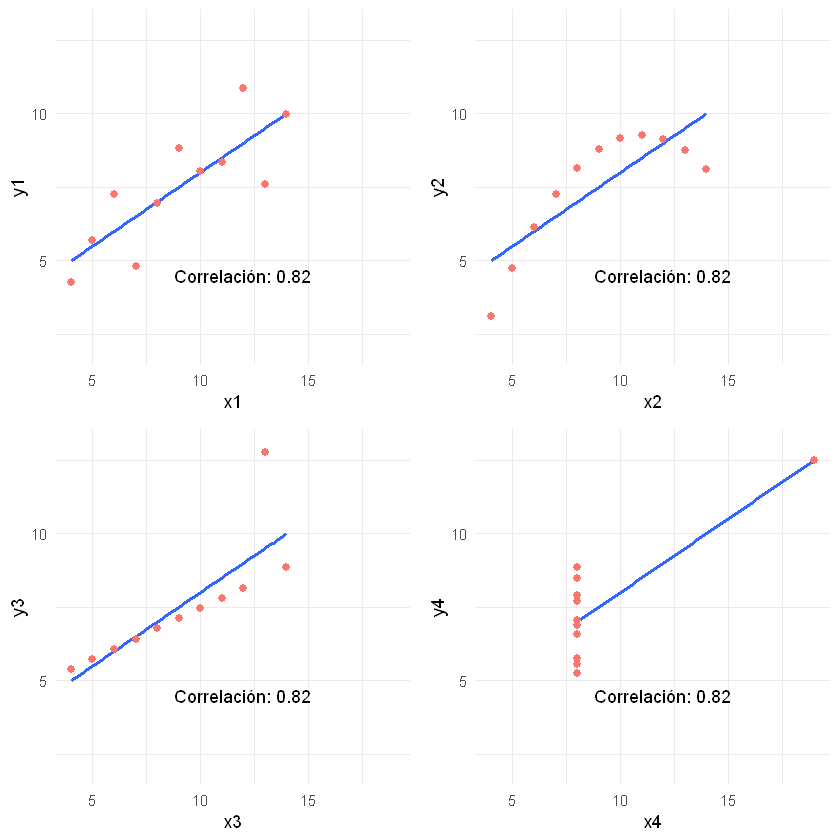

In [387]:
library(dplyr)
library(gridExtra)
anscombe_data = read.delim(file="https://goo.gl/mVLz5L", header = T)
# Calcular la correlación
cor_1 = cor(anscombe_data$x1, anscombe_data$y1)
cor_2 = cor(anscombe_data$x2, anscombe_data$y2)
cor_3 = cor(anscombe_data$x3, anscombe_data$y3)
cor_4 = cor(anscombe_data$x4, anscombe_data$y4)
# Definir la función
plot_anscombe <- function(x, y, value, type)
{ # 'anscombe_data' es una variable global, esto es
# una mala práctica de programación ;)
p=ggplot(anscombe_data, aes_string(x,y)) +
geom_smooth(method='lm', fill=NA) +
geom_point(aes(colour=factor(1),
fill = factor(1)),
shape=21, size = 2
) +
ylim(2, 13) +
xlim(4, 19) +
theme_minimal() +
theme(legend.position="none") +
annotate("text",
x = 12,
y =4.5,
label =
sprintf("%s: %s",
type,
round(value,2)
)
)
return(p)
}
# Graficar en una cuadrícula de 2x2
grid.arrange(plot_anscombe("x1", "y1", cor_1, "Correlación"),
plot_anscombe("x2", "y2", cor_2, "Correlación"),
plot_anscombe("x3", "y3", cor_3, "Correlación"),
plot_anscombe("x4", "y4", cor_4, "Correlación"),
ncol=2, nrow=2)


## Punto 4
### Comparación mediante histograma

### Secundaria - primer año

In [388]:
secundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

### Comparación mediante Boxplot

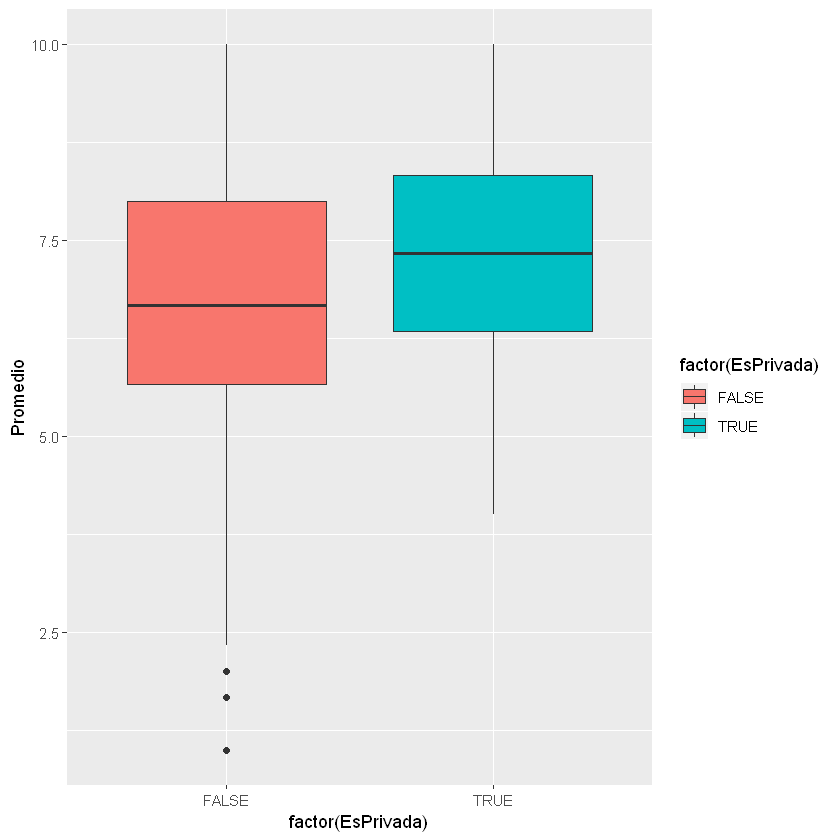

In [389]:
g2 <- ggplot(secundaria_Mat_1, aes(factor(EsPrivada), Promedio))
g2 + geom_boxplot(aes(fill = factor(EsPrivada)))

## Punto 5

### Comparación de promedios de matemáticas de los diferentes años en distintos turnos

In [390]:
ftable(filter(dataset_mas_limpio, asignatura == "MATEMÁTICA" & Modalidad == "Primaria")$turno)

 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
      118          2   1936      157  2999

In [391]:
ftable(filter(dataset_mas_limpio, asignatura == "LENGUA" & Modalidad == "Primaria")$turno)

 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
      118          2   1964      158  2990

### Primaria

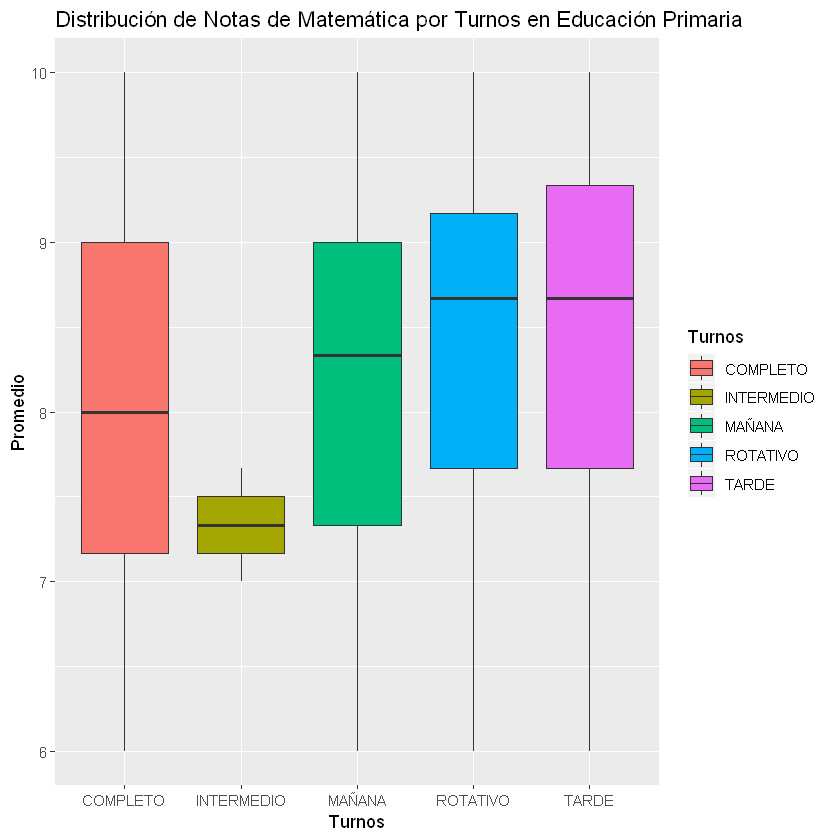

In [392]:
#g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria'),aes(factor(turno),Promedio))
#g2 + geom_boxplot(aes(fill = factor(turno))
para_nombres<- filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria')
Turnos <- factor(para_nombres$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Matemática por Turnos en Educación Primaria")


### Secundaria

In [393]:
ftable(filter(dataset_mas_limpio, asignatura == "MATEMATICA" & Modalidad == "Secundaria")$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     91   5727    16       11  1259         21

In [394]:
ftable(filter(dataset_mas_limpio, asignatura == "LENGUA Y LITERATURA" & Modalidad == "Secundaria")$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     86   2829    52       11  1055         21

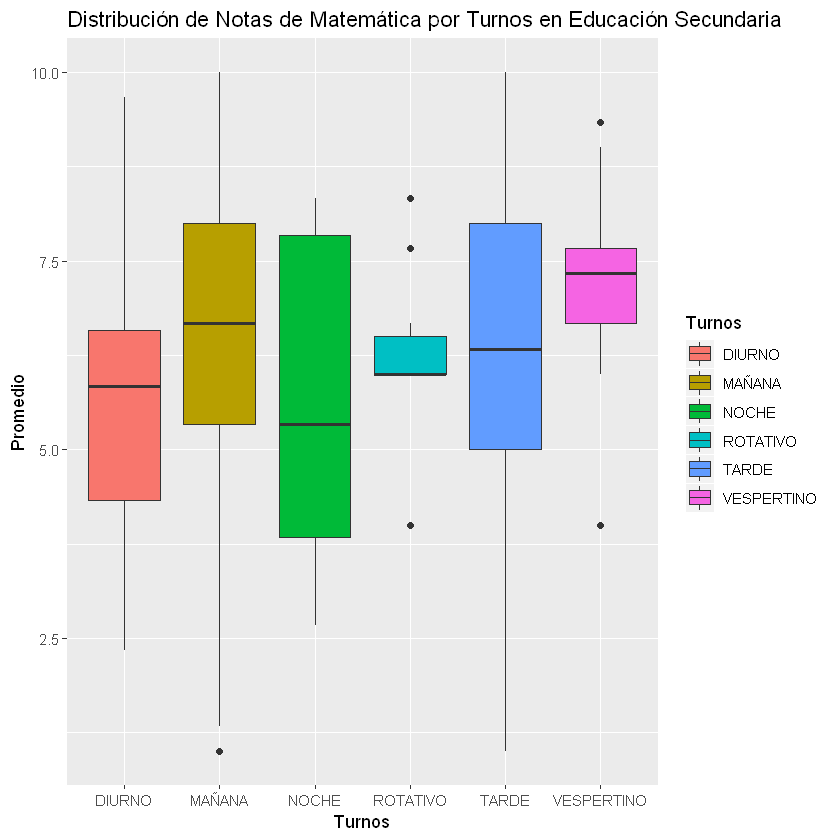

In [395]:
#g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria'),aes(factor(turno),Promedio))
#g2 + geom_boxplot(aes(fill = factor(turno)))
v<- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Matemática por Turnos en Educación Secundaria")

### Comparación de los promedios de lengua en distintos turnos

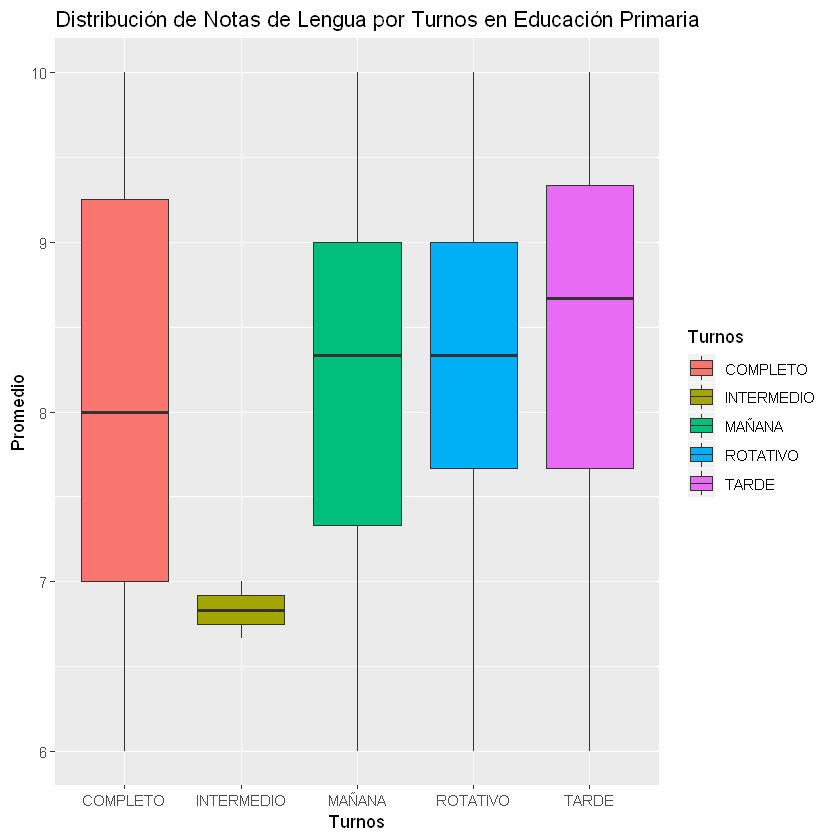

In [396]:
v<- filter(dataset_mas_limpio,asignatura=="LENGUA" & Modalidad=='Primaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="LENGUA" & Modalidad=='Primaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Lengua por Turnos en Educación Primaria")

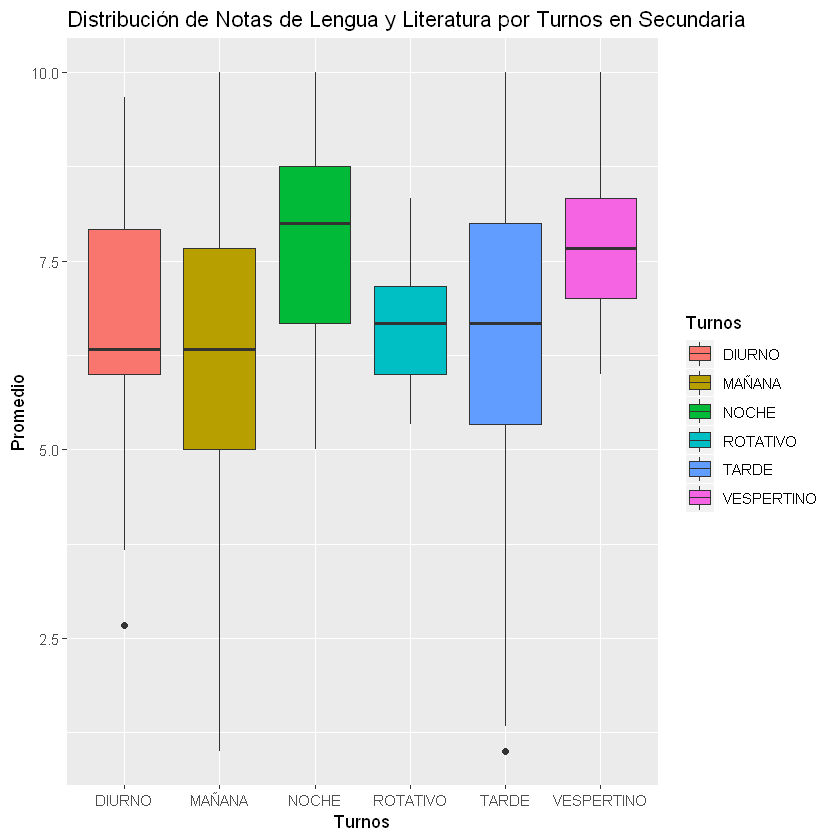

In [397]:
v<- filter(dataset_mas_limpio,asignatura=="LENGUA Y LITERATURA" & Modalidad=='Secundaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="LENGUA Y LITERATURA" & Modalidad=='Secundaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Lengua y Literatura por Turnos en Secundaria")

## Punto 6

[1] 887   3

[1] 862   3

Documento,Prom_Mat,EsPrivada,Prom_Bio,EsPrivada.y
34680594,4.666667,FALSE,5.333333,FALSE
46082290,6.666667,FALSE,6.333333,FALSE
46520307,4.000000,FALSE,7.000000,FALSE
46520314,2.000000,FALSE,3.333333,FALSE
46778660,3.000000,FALSE,5.333333,FALSE
46778660,4.000000,FALSE,5.333333,FALSE


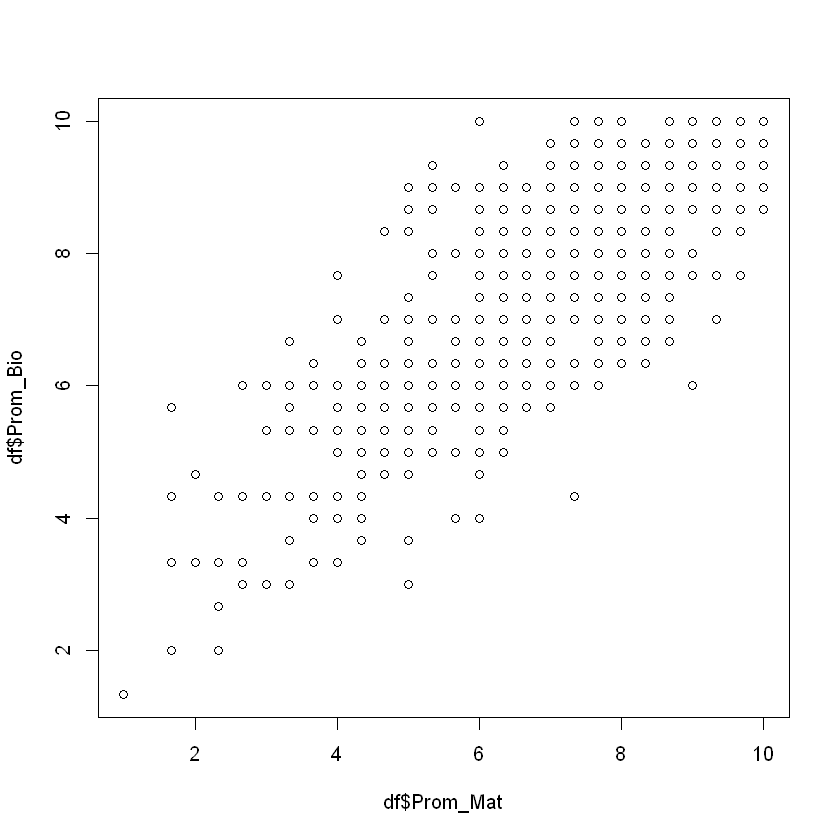

In [398]:
#diagrama de dispersión
#deben tener misma dimension
rm(df)
dim(dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada"))
dim(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado == 1),"Documento","Promedio","EsPrivada"))
df<- dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"),by="Documento")
df<-rename(df,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y,EsPrivada=EsPrivada.x)
head(df)
plot(df$Prom_Mat, df$Prom_Bio)

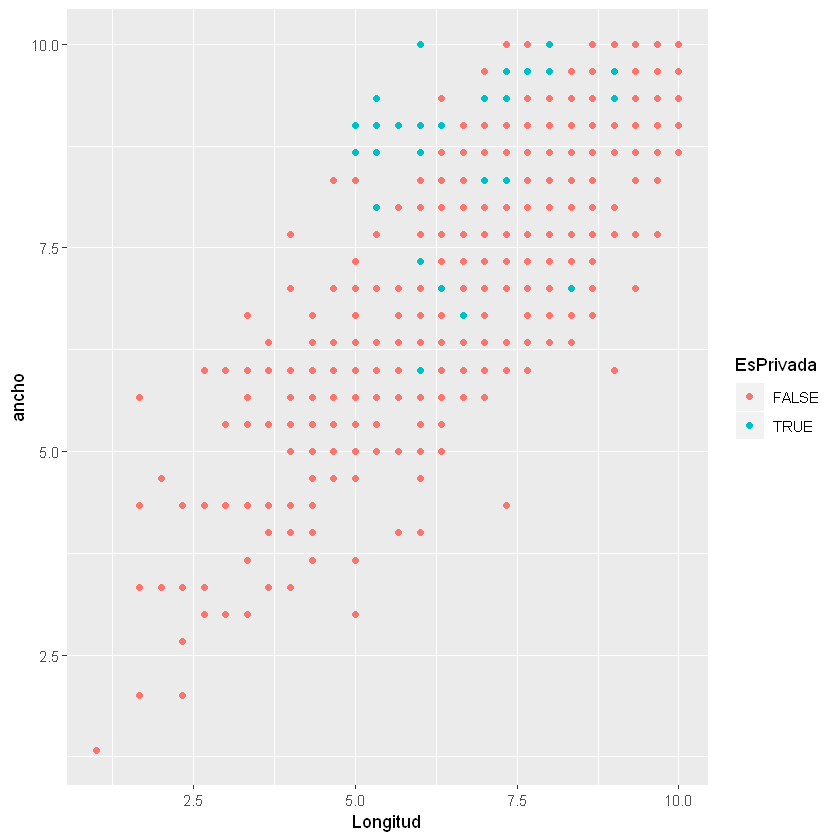

In [399]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio))+geom_point(aes(colour=EsPrivada)
)+xlab("Longitud")+ylab("ancho")

### Diagrama de dispersión para todos los años de secundaria de matematica vs biologia

[1] 7079    2

[1] 5947    2

Documento,Prom_Mat,AñoCursado,Prom_Bio,AñoCursado.y
34680594,4.666667,1,5.333333,1
41176268,6.000000,5,6.000000,5
42580382,5.333333,5,6.666667,5
43340727,9.000000,5,6.666667,5
43534411,4.666667,3,3.333333,3
44103845,5.666667,5,9.000000,5


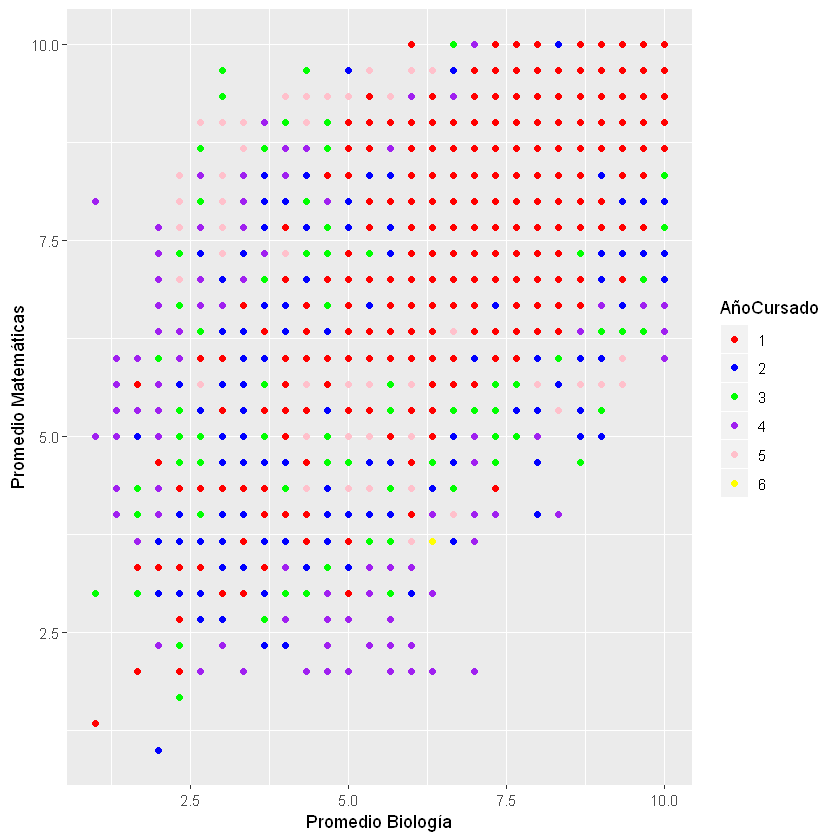

In [417]:
#diagrama de dispersión
#deben tener misma dimension
rm(df2)

secundaria_mat_todos_no_7 <- dplyr::filter(dataset_mas_limpio, asignatura == "MATEMATICA" & Modalidad == "Secundaria" & AñoCursado %in% c(1, 2, 3, 4, 5, 6))
dim(dplyr::select(secundaria_mat_todos_no_7,"Documento","Promedio"))
dim(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA"),"Documento","Promedio"))
df2<- dplyr::select(secundaria_mat_todos_no_7,"Documento","Promedio","AñoCursado") %>% inner_join(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA"),"Documento","Promedio","AñoCursado"),by="Documento")
df2<-rename(df2,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y, AñoCursado=AñoCursado.x)
df2$AñoCursado <- as.factor(df2$AñoCursado)
head(df2)
ggplot(data=df2, aes(x=Prom_Mat,y=Prom_Bio))+ geom_point(aes(colour=AñoCursado)
)+xlab("Promedio Biología")+ylab("Promedio Matemáticas")+scale_color_manual(values = c("red", "blue", "green", "purple", "pink", "yellow"))

### Como observamos claramente, el año más prometedor para una posible correlación es primero. Por lo que a partir de este momento centraremos el estudio en este año.

In [418]:
df2_primero <- dplyr::filter(df2, AñoCursado == "1")
head(df2_primero)

Documento,Prom_Mat,AñoCursado,Prom_Bio,AñoCursado.y
34680594,4.666667,1,5.333333,1
46082290,6.666667,1,6.333333,1
46520307,4.000000,1,7.000000,1
46520314,2.000000,1,3.333333,1
46778660,3.000000,1,5.333333,1
46778660,4.000000,1,5.333333,1


### Graficamos nuevamamente solamente primer año

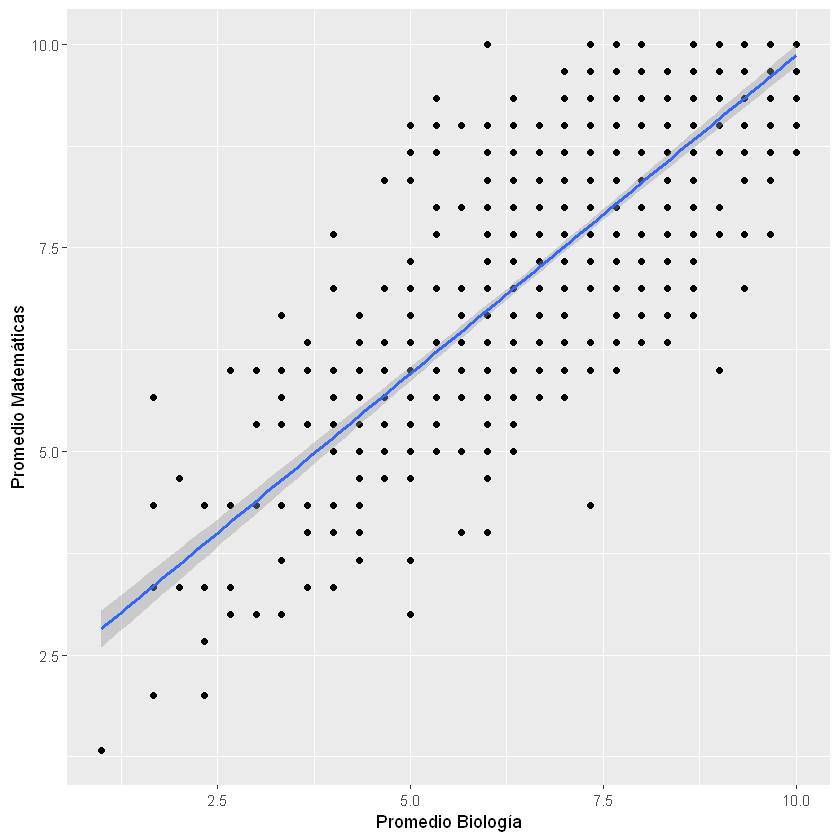

In [419]:
ggplot(data=df2_primero, aes(x=Prom_Mat,y=Prom_Bio))+geom_point()+ 
       geom_smooth(method = "lm")+xlab("Promedio Biología")+ylab("Promedio Matemáticas")

### Matriz de Varianza

In [403]:
dataM <- na.omit(data.frame(df2_primero$Prom_Mat, df2_primero$Prom_Bio)) 
dataM <-rename(dataM,Prom_Mat=df2_primero.Prom_Mat, Prom_Bio=df2_primero.Prom_Bio)
var(dataM)

,Prom_Mat,Prom_Bio
Prom_Mat,2.929701,2.290467
Prom_Bio,2.290467,2.763261


### Primero debemos verificar normalidad de las variables a utilizar, Prom_Mat y Prom_Bio
### Usamos Lilliefors (Kolmogorov-Smirnov) para realizarlo ya que nuestra muestra es mayor a 50

In [404]:
#conda install -c conda-forge r-nortest
library(nortest)
lillie.test(x = dataM$Prom_Mat)
lillie.test(x = dataM$Prom_Bio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Mat
D = 0.088996, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Bio
D = 0.086081, p-value < 2.2e-16


### El p-value para ambas variables es menor a 0.05, lo que significa que rechazamos H0 y podemos decir que las variables no presentan una distribución normal, por lo que usaremos el método de Spearman para comprobar linealidad entre las mismas

In [405]:
cor_spearman <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")
cor_spearman

[1] 0.7804692

### Podemos ver gráficamente el resultado también

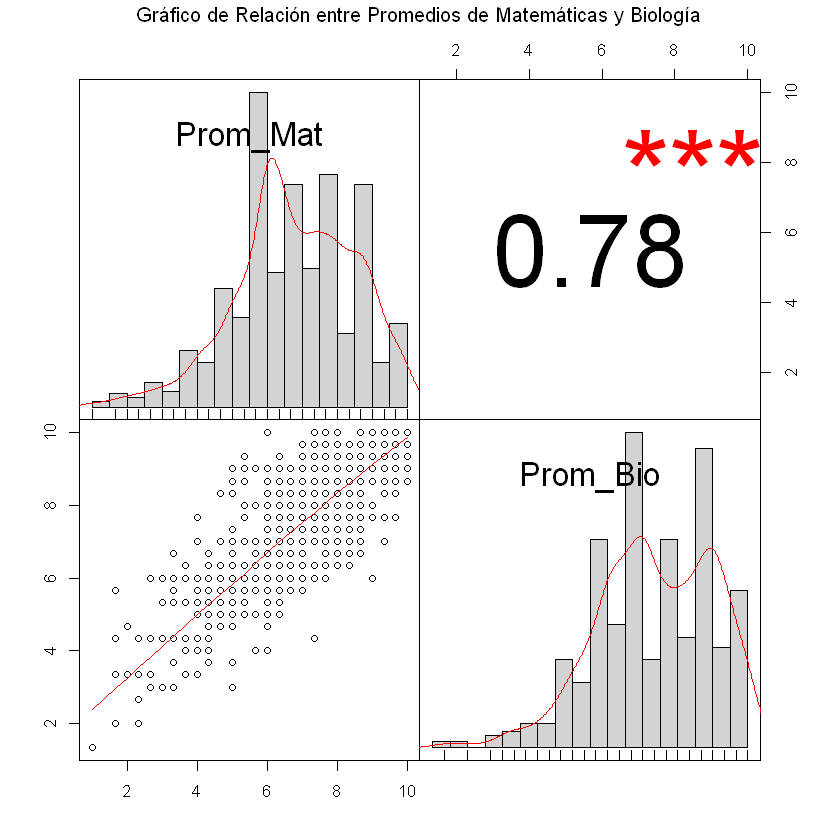

In [406]:
library("PerformanceAnalytics")
chart.Correlation(dataM, histogram = TRUE, method = "spearman")
mtext("Gráfico de Relación entre Promedios de Matemáticas y Biología", side=3, line=3)

### Podemos decir que las variables presentan una correlación buena, esto significa que si a un alumno le va bien en matemáticas, le irá bien en biología y lo mismo inversamente.

In [407]:
per <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "pearson")
ken <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "kendall")
spe <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")

data <- data.frame(name=c("pearson","kendall","spearman") , value=c(per,ken,spe))

data

name,value
pearson,0.8050104
kendall,0.6298612
spearman,0.7804692


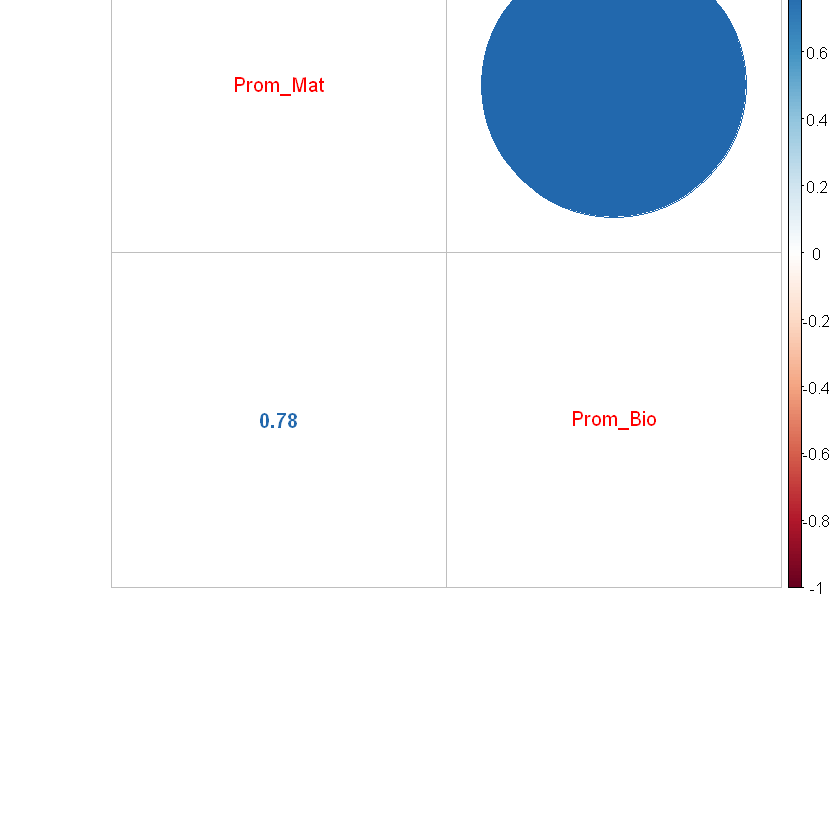

In [408]:
library(corrplot)
corrplot.mixed(cor(dataM, method = "spearman"),addshade="all")

### Añadimos lengua como tercera variable de estudio

In [420]:
rm(df3)
df3 <- dplyr::select(secundaria_len_1,"Documento","Promedio", "AñoCursado")

df2<- df2 %>% inner_join(df3,by="Documento")

In [421]:

dataN <-rename(df,Prom_Len=Promedio)
dataN <- na.omit(dataN) 
dataN <-dplyr::select(dataN,Prom_Mat,Prom_Bio,Prom_Len)
dim(dataN)
head(dataN)

[1] 1148    3

Prom_Mat,Prom_Bio,Prom_Len
4.666667,5.333333,5.000000
6.666667,6.333333,5.333333
4.000000,7.000000,6.000000
2.000000,3.333333,3.666667
3.000000,5.333333,5.333333
3.000000,5.333333,5.333333


In [422]:
library(ppcor)
pcor(dataM, method = c("spearman"))

,Prom_Mat,Prom_Bio
Prom_Mat,1.0000000,0.7804692
Prom_Bio,0.7804692,1.0000000
,Prom_Mat,Prom_Bio
Prom_Mat,0.000000e+00,1.344724e-186
Prom_Bio,1.344724e-186,0.000000e+00
,Prom_Mat,Prom_Bio
Prom_Mat,0.00000,37.53401
Prom_Bio,37.53401,0.00000


In [423]:
pcor(dataN, method = c("spearman"))

,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,1.0000000,0.3266264,0.4784281
Prom_Bio,0.3266264,1.0000000,0.5280509
Prom_Len,0.4784281,0.5280509,1.0000000
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.000000e+00,6.389809e-30,1.159734e-66
Prom_Bio,6.389809e-30,0.000000e+00,2.358793e-83
Prom_Len,1.159734e-66,2.358793e-83,0.000000e+00
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.00000,11.69369,18.43581
Prom_Bio,11.69369,0.00000,21.04079


In [424]:
ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))
pcor1<-ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))

[1] 0.3925601

In [425]:
library("pwr")
pwr.r.test(n = length(row.names(dataN)), r = pcor1, sig.level = .05, power = NULL)



     approximate correlation power calculation (arctangh transformation) 

              n = 1148
              r = 0.3925601
      sig.level = 0.05
          power = 1
    alternative = two.sided
